# Preamble

In [1]:
dir_home = '../'
dir_data = dir_home+'data/'
dir_fig = dir_home+'figs/'
import sys
sys.path.insert(0, dir_home)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from preamble import *
from my_units import *
from signal_functions import *
from param_card import *

# Analytics

## Tangent expansion

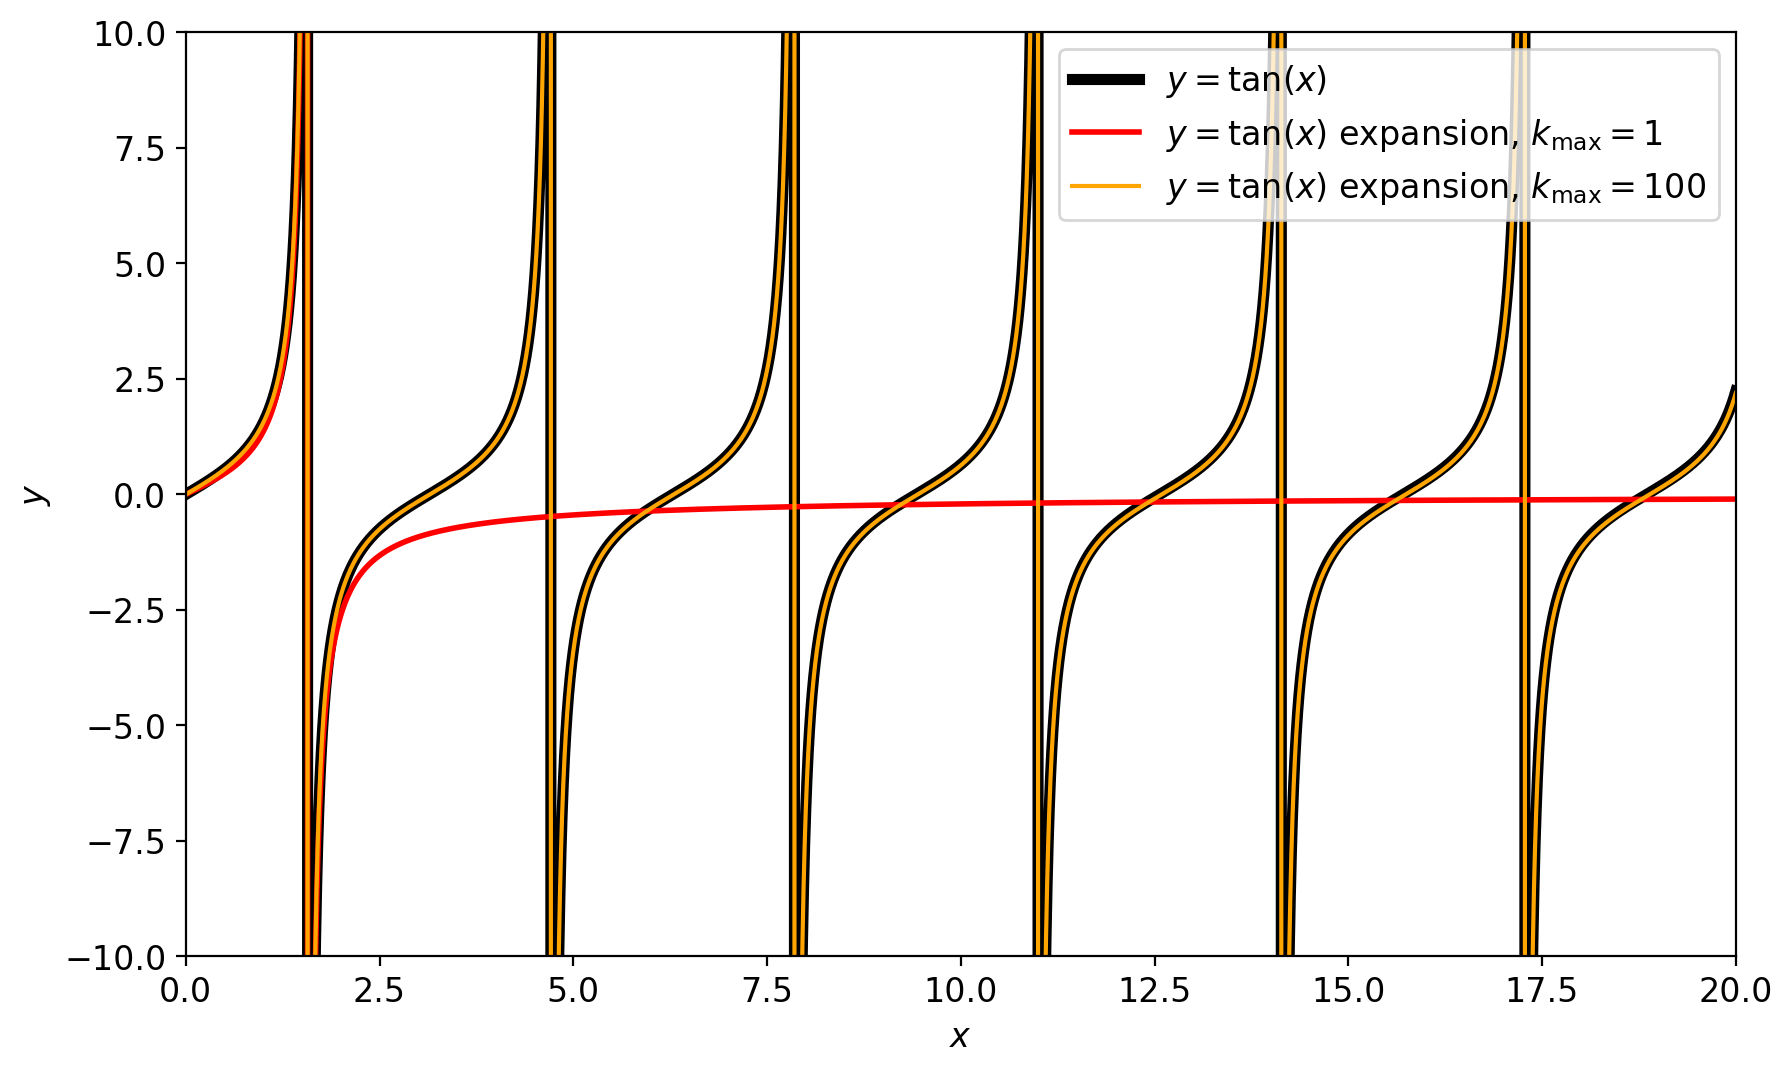

In [2]:
vec_x = np.linspace(1e-10,20,10000)
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(vec_x, np.tan(vec_x),lw=4,color='black',label=r'$y = \tan(x)$')
ax.plot(vec_x,fn_tan_expansion(vec_x,1,1),lw=2, color='red', label=r'$y = \tan(x)$ expansion, $k_\mathrm{max} = 1$')
ax.plot(vec_x,fn_tan_expansion(vec_x,1,100),lw=1.5,color='orange',label=r'$y = \tan(x)$ expansion, $k_\mathrm{max} = 100$')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_xlim(0,20); ax.set_ylim(-10,10); 
ax.legend();

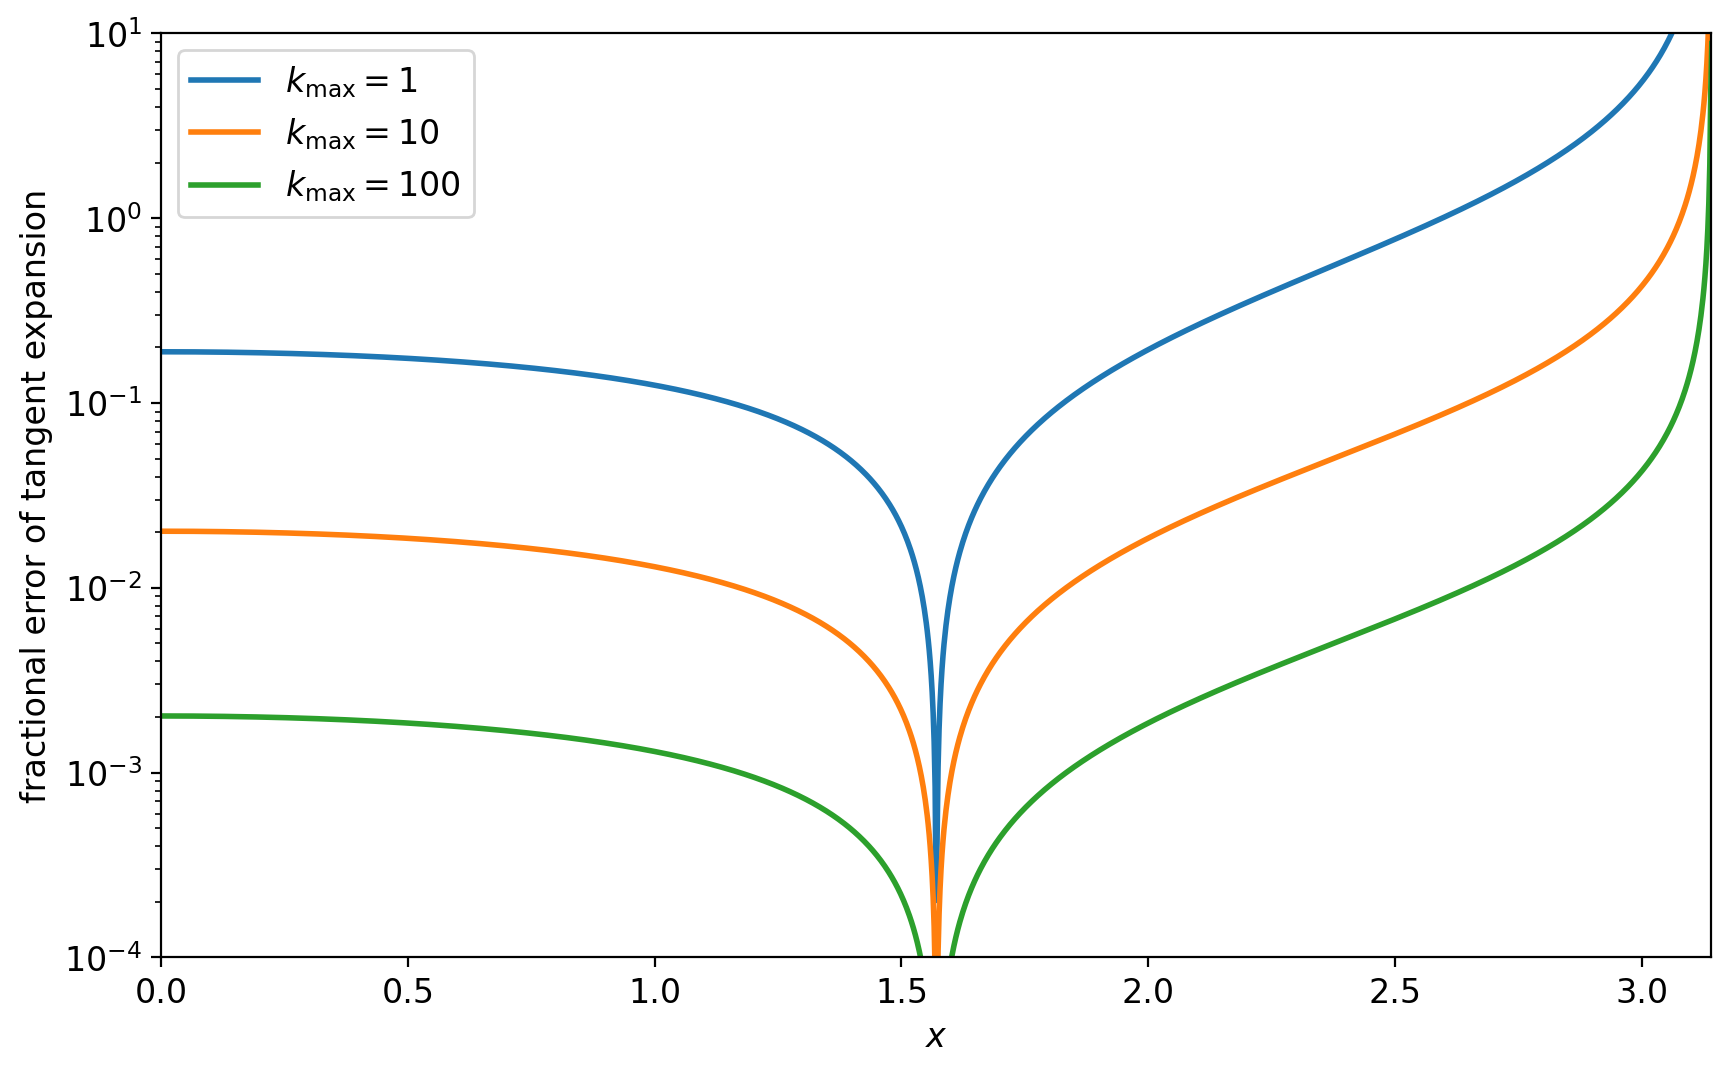

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(vec_x,np.abs(fn_tan_expansion(vec_x,1,1)/np.tan(vec_x)-1),lw=2,label='$k_\mathrm{max} = 1$')
ax.plot(vec_x,np.abs(fn_tan_expansion(vec_x,1,10)/np.tan(vec_x)-1),lw=2,label='$k_\mathrm{max} = 10$')
ax.plot(vec_x,np.abs(fn_tan_expansion(vec_x,1,100)/np.tan(vec_x)-1),lw=2,label='$k_\mathrm{max} = 100$')
#ax.plot(vec_x,fn_tan_expansion(vec_x,1,100),lw=1,color='yellow')
ax.set_yscale('log')
ax.set_xlabel('$x$'); ax.set_ylabel("fractional error of tangent expansion"); ax.set_xlim(0,np.pi); ax.set_ylim(1e-4,1e1); 
ax.legend();

## Relativistic enhancement factors

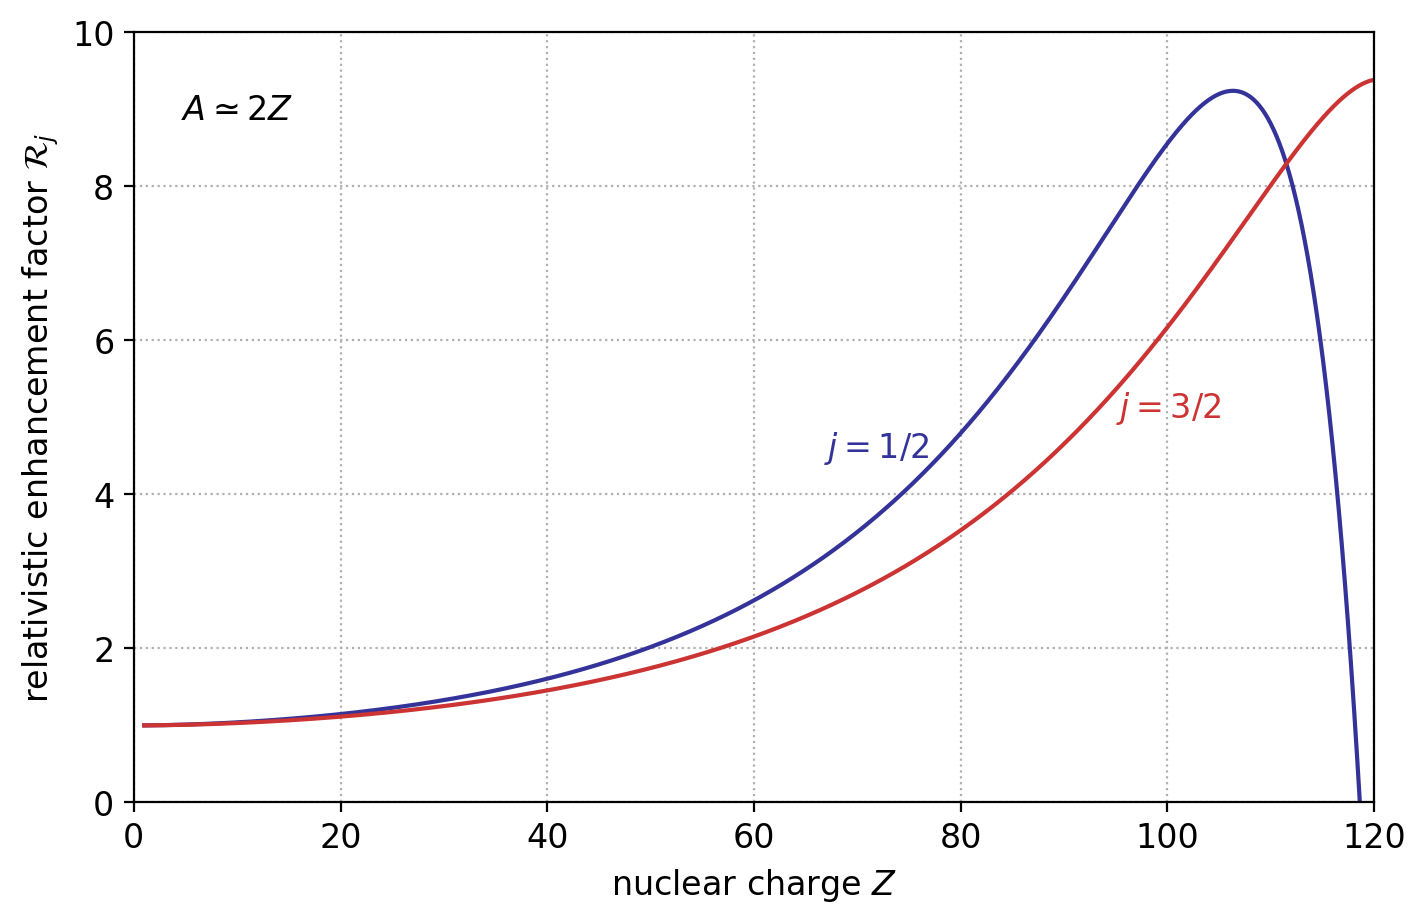

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.set_xlim(0,120); ax.set_ylim(0,10); ax.set_yscale('linear')
ax.set_xlabel(r'nuclear charge $Z$'); ax.set_ylabel(r'relativistic enhancement factor $\mathcal{R}_j$')
vec_Z = np.arange(1.,121.,0.1);
ax.plot(vec_Z,fn_R_rel_factor_12(vec_Z),color=(0.2,0.2,0.6,1));
ax.plot(vec_Z,fn_R_rel_factor_32(vec_Z),color=(0.8,0.2,0.2,1));
ax.grid(ls='dotted')
ax.text(10,9,r'$A \simeq 2 Z$',ha='center',va='center');
tmp1 = 77; tmp2=95;
ax.text(tmp1,fn_R_rel_factor_12(tmp1),'$j=1/2$',color=(0.2,0.2,0.6,1),ha='right',va='bottom')
ax.text(tmp2,fn_R_rel_factor_32(tmp2),'$j=3/2$',color=(0.8,0.2,0.2,1),ha='left',va='top');

In [5]:
fig.savefig(dir_fig+'R_rel_factor.pdf', bbox_inches='tight', pad_inches = 0)

# Signal and noise at fixed crystal parameters

## Parameters

In [6]:
print('V_c =', V_c/BohrRadius**3, 'a_0^3')
print("c_11 =",c_11/GPa,"GPa")
print('v =',v) 
print("beta_11 =",beta_11)
print("k^2 = ",k2);

V_c = 942.3978282132456 a_0^3
c_11 = (312.7337437537134+3.127337437537134e-07j) GPa
v = (1.7028486366415224e-05+8.514243183207615e-15j)
beta_11 = (0.333333333333+3.33333333333e-07j)
k^2 =  (0.04444821581051193-4.4492664026322474e-08j)


flux noise spectral density amplitude is $10^{-6} \Phi_0 / \sqrt{Hz}$

energy resolution is equal to $S_\Phi/2L_s$ (minimum for optimized squid is $h/2 = \pi$) [Tesche, Clarke (1977)]

In [7]:
Phi0 = np.pi/ElectronCharge
print('L_squid =',L_squid/Henry,'Henry')
print('flux noise =',np.sqrt(fn_S_flux_squid(0,S_flux_squid)) / (Phi0/np.sqrt(Hz)),'Phi0/sqrt(Hz)')
print('energy resolution =',fn_S_flux_squid(0,S_flux_squid) / (2 * L_squid))

L_squid = 5e-09 Henry
flux noise = 1e-06 Phi0/sqrt(Hz)
energy resolution = 4.069663463804342


specify fiducial crystal thickness

In [8]:
l = 4 * CentiMeter; N_series = 1; N_parallel = 1; 
omega_0 = np.abs(fn_omega_n(l,v,1)); 
omega_res = fn_omega_res(l,v,h_11,c_11,beta_11);
print('omega_0 =',omega_0/(2*np.pi*1e6*Second**-1),'MHz')

C_c = fn_C_crystal_TE_c(l,a,b,beta_11)
C_1_fid = np.real(C_c)
L_1_fid = 1/(omega_0**2 * np.real(C_c))

omega_0 = 0.06381264729758887 MHz


## Plots

### Axion Voltage

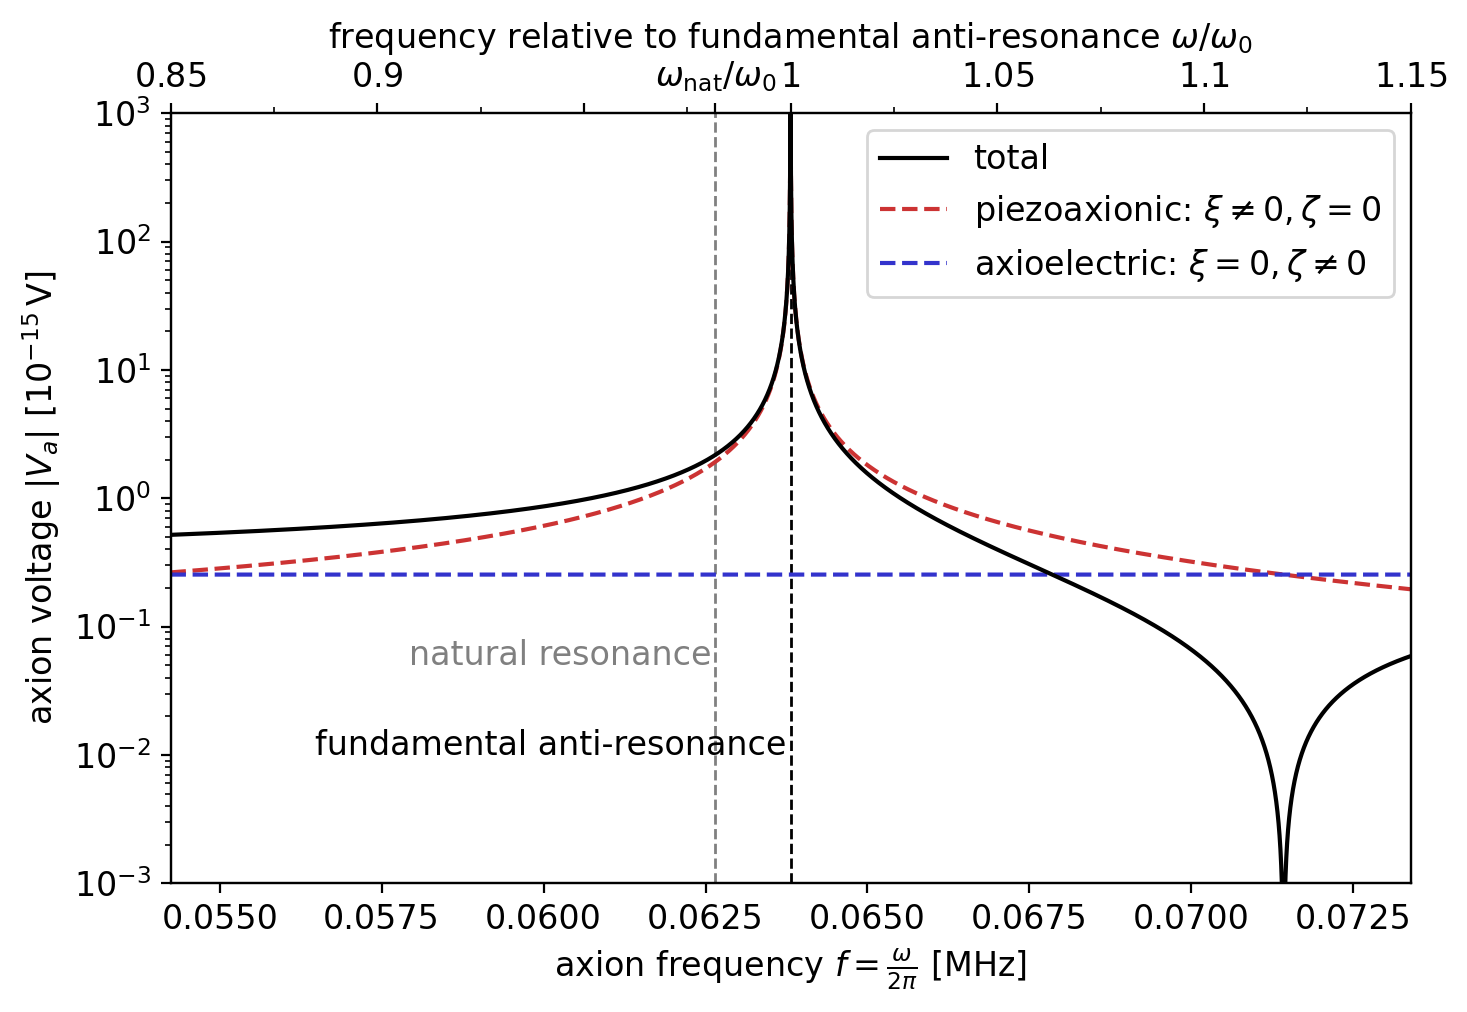

In [9]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
xlim = (0.85 * omega_0 / (2*np.pi * 1e6*Second**-1), 1.15 * omega_0 / (2*np.pi * 1e6*Second**-1))
ylim = (1e-3,1e3)
vec_omega = np.sort(np.concatenate([np.linspace(0.85 * omega_0, 1.15 * omega_0, 50000)]))
ax.axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax.axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')
ax.plot(vec_omega/(2*np.pi * 1e6*Second**-1),np.abs(fn_V_axion(vec_omega,xi_11,0,l,v,h_11,c_11,N_series,P_nuc)/ (1e-15 * Volt)),
       ls = 'dashed', color=(0.8,0.2,0.2), label = r'piezoaxionic: $\xi \neq 0, \zeta = 0$');
ax.plot(vec_omega/(2*np.pi * 1e6*Second**-1),np.abs(fn_V_axion(vec_omega,0,zeta_11,l,v,h_11,c_11,N_series,P_nuc) / (1e-15 * Volt)),
       ls = 'dashed', color=(0.2,0.2,0.8), label = r'axioelectric: $\xi = 0, \zeta \neq 0$');
ax.plot(vec_omega/(2*np.pi * 1e6*Second**-1),np.abs(fn_V_axion(vec_omega,xi_11,zeta_11,l,v,h_11,c_11,N_series,P_nuc) / (1e-15 * Volt)),
       ls = 'solid', color = 'black', label = 'total');

handles, labels = fig.gca().get_legend_handles_labels()
order = [2,0,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right');

ax.set_xlabel(r'axion frequency $f = \frac{\omega}{2\pi} ~ [\mathrm{MHz}]$');
ax.set_ylabel(r'axion voltage $|V_a| ~ [\mathrm{10^{-15}\, V}]$')
ax.set_yscale('log');
ax.set_xlim(xlim); ax.set_ylim(ylim);
ticks_minor = np.arange(0.03,0.042,0.0005)
ticks_minor = ticks_minor[(ax.get_xlim()[0] < ticks_minor) & (ticks_minor < ax.get_xlim()[1])]
ax.set_xticks(ticks_minor,minor=True)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('linear');
ax_top.set_xlabel('frequency relative to fundamental anti-resonance $\omega/\omega_0$');
ticks_top_minor = omega_0 * np.arange(0.85,1.151,0.025) / (2*np.pi * 1e6*Second**-1)
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = np.sort(np.concatenate([[omega_res], omega_0 * np.arange(0.85,1.151,0.05)])) / (2*np.pi * 1e6*Second**-1)
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True)
ax_top.set_xticks(ticks_top_major,minor=False); ax_top.set_xticklabels(['$0.85$','$0.9$','','$\omega_\mathrm{nat}/\omega_0$','$1$','$1.05$','$1.1$','$1.15$'],minor=False);
ax.text(omega_res / (2*np.pi*1e6*Second**-1)*(0.999),0.05,
        'natural resonance',color='gray',ha='right');
ax.text(omega_0 / (2*np.pi*1e6*Second**-1)*(0.999),0.01,
        'fundamental anti-resonance',color='black',ha='right');

In [10]:
fig.savefig(dir_fig+'V_a_fundamental.pdf', bbox_inches='tight', pad_inches = 0)

### Impedances

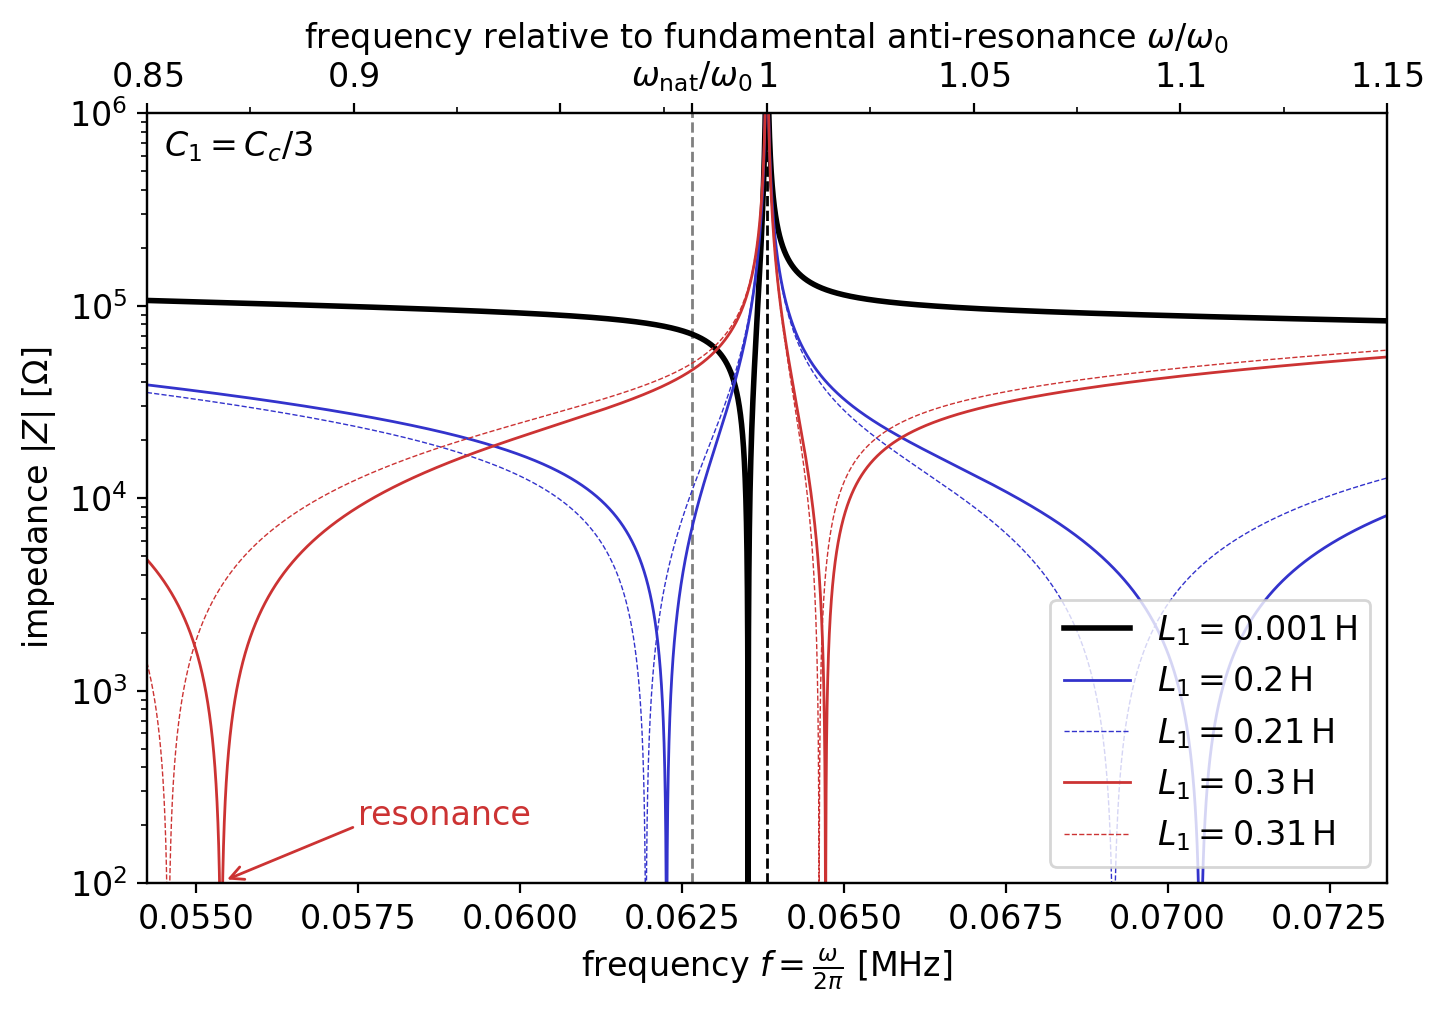

In [11]:
C_1 = (1/3) * C_1_fid
fig,ax = plt.subplots(1,1,figsize=(8,5))
xlim = np.asarray([0.85 * omega_0, 1.15 * omega_0])/(2*np.pi* 1e6 * Second**-1)
ylim = (1e2,1e6)
ax.set_xlim(xlim); ax.set_ylim(ylim)
ax.axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax.axvline(omega_res / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')
vec_omega = np.linspace(0.85 * omega_0, 1.15 * omega_0, 100000)
colors = [(0,0,0),(0.2,0.2,0.8),(0.2,0.2,0.8),(0.8,0.2,0.2),(0.8,0.2,0.2)]
list_ls = ['solid','solid','dashed','solid','dashed']
list_lw = [2,1,0.5,1,0.5]
vec_L_1 = np.asarray([0.001, 0.2, 0.21, 0.3, 0.31]) * Henry * (1-1j*eps_L_1)
for i_L_1, L_1 in enumerate(vec_L_1):
    vec_Z_total = fn_Z_total(vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f,N_series,N_parallel)
    ax.plot(vec_omega / (2*np.pi * 1e6 * Second**-1), np.abs(vec_Z_total)/Ohm,color=colors[i_L_1],ls=list_ls[i_L_1],lw=list_lw[i_L_1], 
            label = '$L_1 =$'+str(np.round((np.real(L_1)/(1e0*Henry)),3))+'$\, \mathrm{H}$');
ax.set_xscale('linear'); ax.set_yscale('log');
ax.set_xlabel(r'frequency $f = \frac{\omega}{2\pi} ~ [\mathrm{MHz}]$'); ax.set_ylabel(r'impedance $|Z| ~ [\mathrm{\Omega}]$');
ax.legend(loc='lower right');
ticks_minor = np.arange(0.03,0.042,0.0005)
ticks_minor = ticks_minor[(ax.get_xlim()[0] < ticks_minor) & (ticks_minor < ax.get_xlim()[1])]
ax.set_xticks(ticks_minor,minor=True)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('linear');
ax_top.set_xlabel('frequency relative to fundamental anti-resonance $\omega/\omega_0$');
ticks_top_minor = omega_0 * np.arange(0.85,1.151,0.025) / (2*np.pi * 1e6*Second**-1)
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = np.sort(np.concatenate([[omega_res], omega_0 * np.arange(0.85,1.151,0.05)])) / (2*np.pi * 1e6*Second**-1)
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True)
ax_top.set_xticks(ticks_top_major,minor=False);
ax_top.set_xticklabels(['$0.85$','$0.9$','','$\omega_\mathrm{nat}/\omega_0$','$1$','$1.05$','$1.1$','$1.15$'],minor=False);
ax.text(xlim[0]*(1.005),6e5,'$C_1 = C_c/3$');
ax.text(0.0575,2e2,'resonance',color=(0.8,0.2,0.2));
#ax.arrow(0.0575,2e2,-0.001, -0.5e2, width = 0.001);
ax.annotate("", xy=(0.0554, 1.02e2), xytext=(0.0575,2e2),arrowprops=dict(arrowstyle="->",color=(0.8,0.2,0.2)));

In [12]:
fig.savefig(dir_fig+'Z_scan.pdf', bbox_inches='tight', pad_inches = 0)

### Quality factor

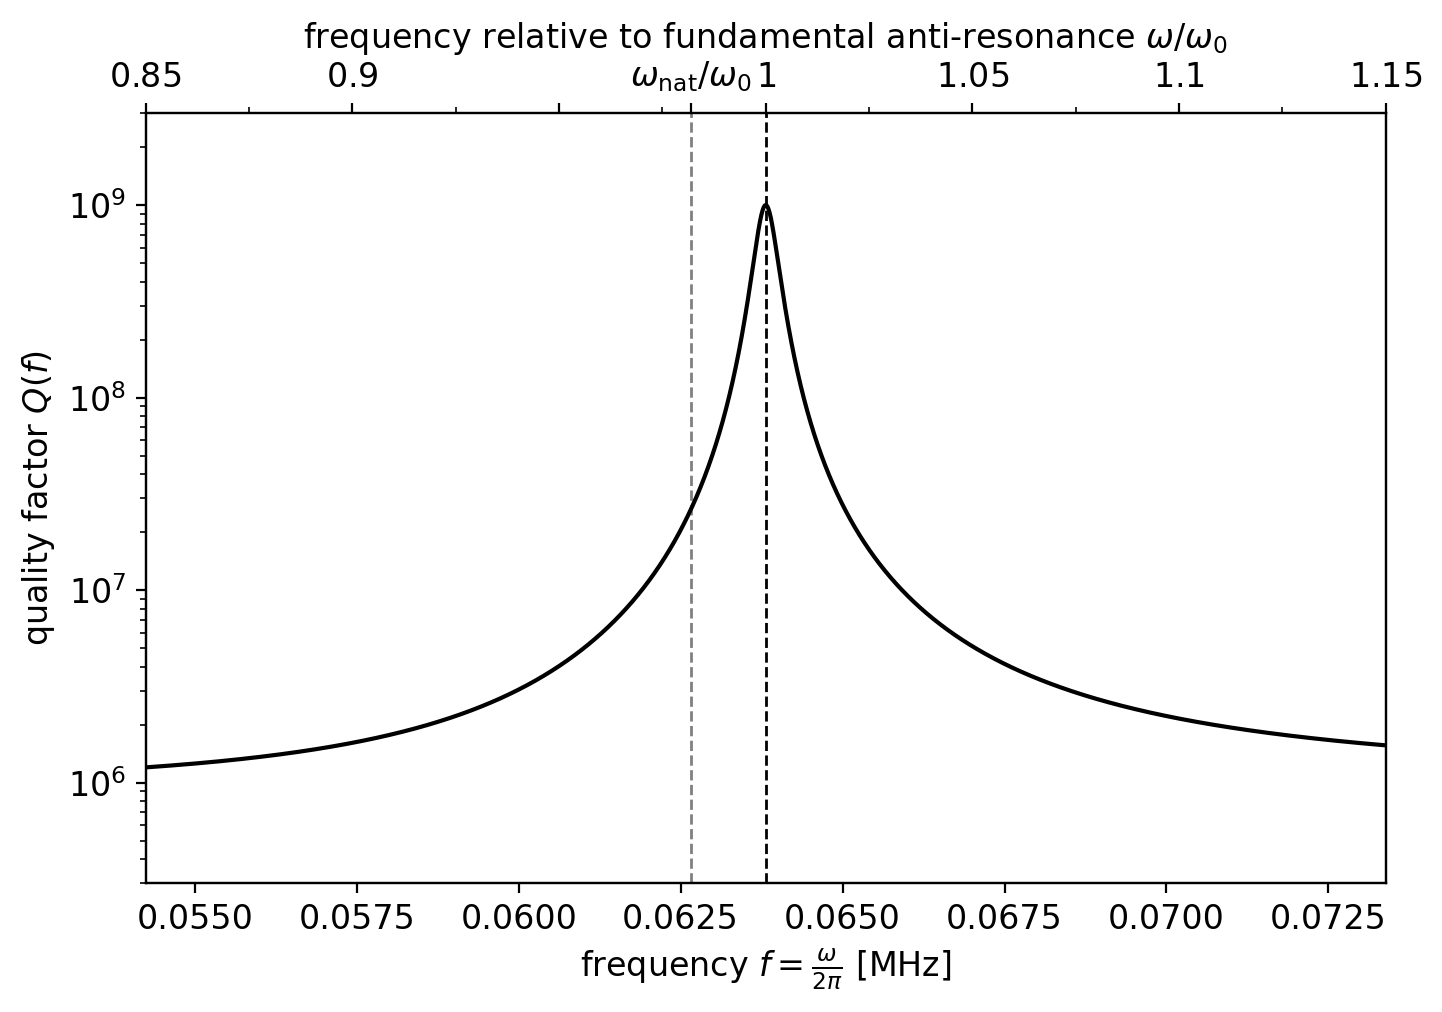

In [13]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
xlim = (0.85 * omega_0 / (2*np.pi * 1e6*Second**-1), 1.15 * omega_0 / (2*np.pi * 1e6*Second**-1))
ylim = (3e5,3e9)
vec_omega = np.sort(np.concatenate([np.linspace(0.85 * omega_0, 1.15 * omega_0, 50000)]))
ax.axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax.axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax.plot(vec_omega/(2*np.pi*1e6*Second**-1), fn_Q_factor(vec_omega,l,v,a,b,beta_11,k2), color='black')

ax.set_xlabel(r'frequency $f = \frac{\omega}{2\pi} ~ [\mathrm{MHz}]$'); ax.set_ylabel(r'quality factor $Q(f)$');
ax.set_yscale('log');
ax.set_xlim(xlim); ax.set_ylim(ylim);
ticks_minor = np.arange(0.03,0.042,0.0005)
ticks_minor = ticks_minor[(ax.get_xlim()[0] < ticks_minor) & (ticks_minor < ax.get_xlim()[1])]
ax.set_xticks(ticks_minor,minor=True)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('linear');
ax_top.set_xlabel('frequency relative to fundamental anti-resonance $\omega/\omega_0$');
ticks_top_minor = omega_0 * np.arange(0.85,1.151,0.025) / (2*np.pi * 1e6*Second**-1)
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = np.sort(np.concatenate([[omega_res], omega_0 * np.arange(0.85,1.151,0.05)])) / (2*np.pi * 1e6*Second**-1)
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True)
ax_top.set_xticks(ticks_top_major,minor=False); ax_top.set_xticklabels(['$0.85$','$0.9$','','$\omega_\mathrm{nat}/\omega_0$','$1$','$1.05$','$1.1$','$1.15$'],minor=False);

In [14]:
fig.savefig(dir_fig+'Q_fundamental.pdf', bbox_inches='tight', pad_inches = 0)

### Noise

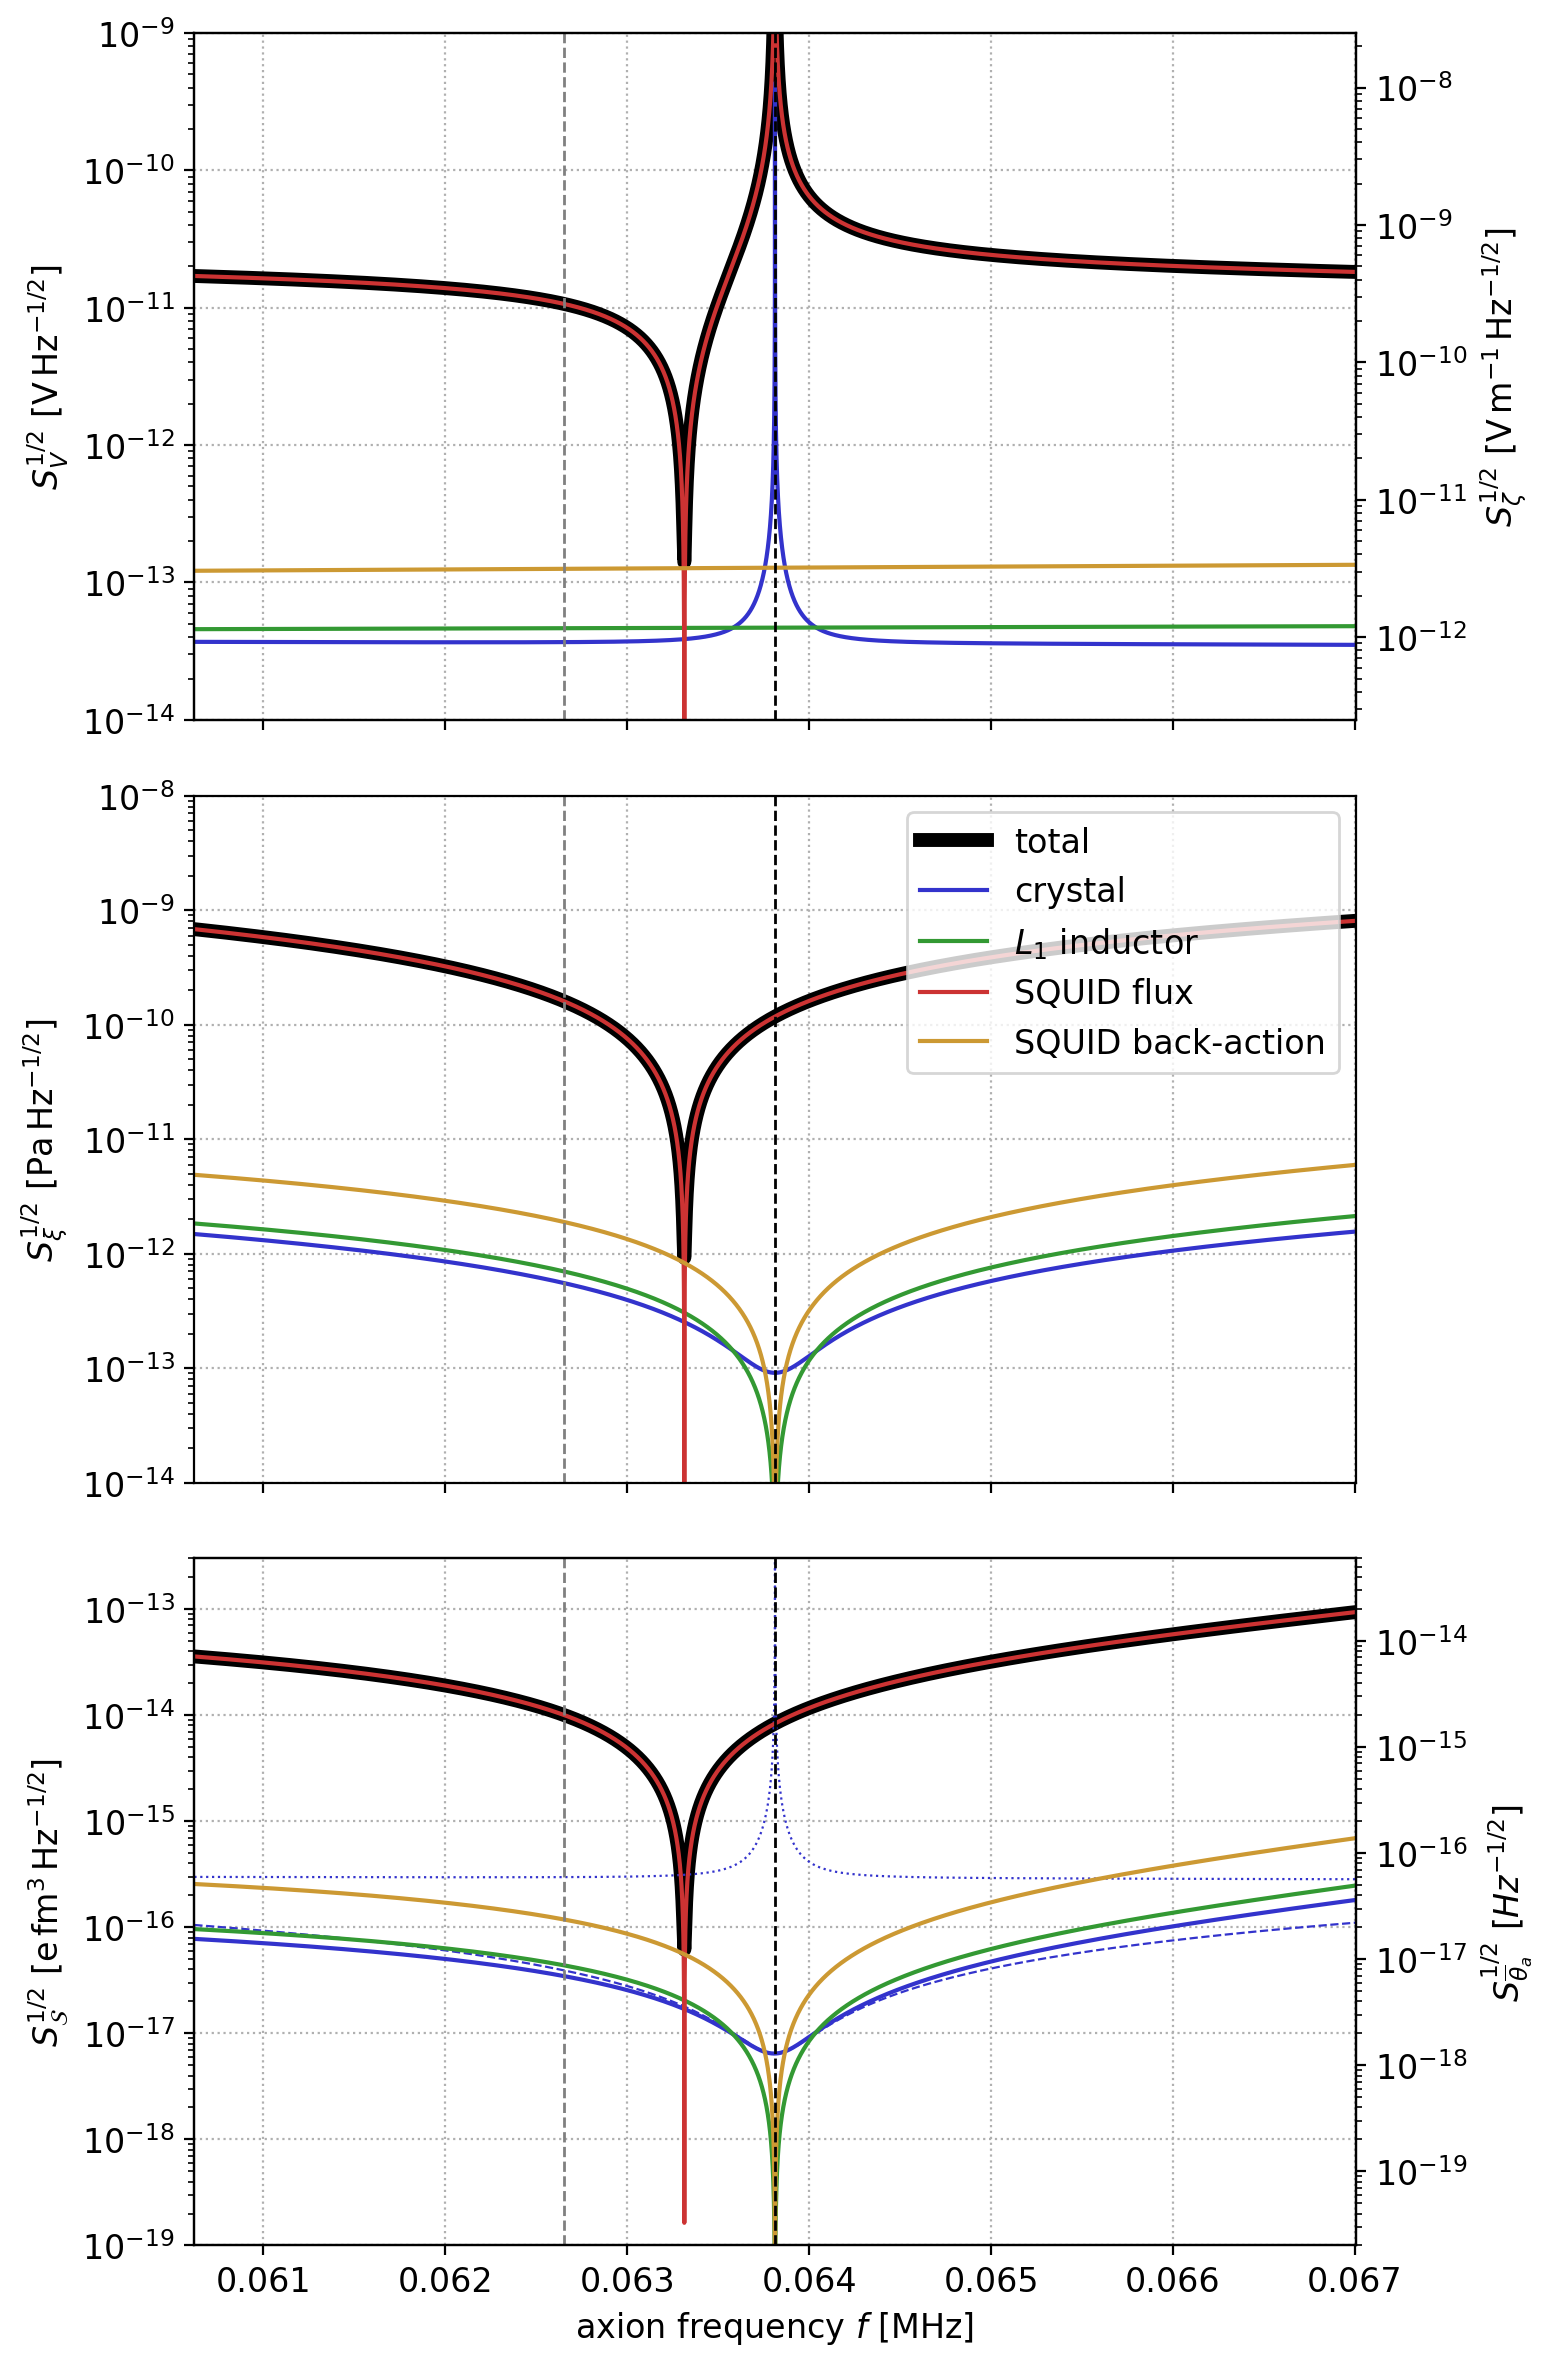

In [15]:
C_1 = (1/3) * np.real(fn_C_crystal_TE_c(l,a,b,beta_11))
L_1 =  0.1 * Henry * (1-1j * eps_L_1)
#L_2 = 0.01 * L_squid

colors=[(0,0,0),(0.2,0.2,0.8),(0.2,0.2,0.8),(0.2,0.2,0.8),(0.2,0.6,0.2),(0.8,0.2,0.2),(0.8,0.6,0.2),(0.6,0.2,0.6),(0,0.5,0.5)]

vec_omega = np.linspace(0.95 * omega_0, 1.05 * omega_0, 200000)

fig, ax = plt.subplots(3, 1, figsize=(8,12))
vec_xi_fac = np.abs(fn_xi_over_V(vec_omega,l,v,h_11,c_11,N_series,P_nuc))
vec_S_schiff_fac = np.abs(fn_V_axion(vec_omega,xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_zeta = np.abs(fn_V_axion(vec_omega,0*xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_xi = np.abs(fn_V_axion(vec_omega,xi_11_over_S,0*zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1

vec_S_V_p_total = fn_S_V_p_total(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, S_flux_squid, T_2, mu_N, n_N, N_series,N_parallel)
vec_S_V_p_crystal_TE = fn_S_V_p_crystal_TE(T,vec_omega,l,v,a,b,beta_11,k2,N_series,N_parallel)
vec_S_V_p_L_1 = fn_S_V_p_L_1(T,vec_omega,L_1)
vec_S_V_p_squid_flux = fn_S_V_p_squid_flux(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, S_flux_squid, N_series,N_parallel)
vec_S_V_p_squid_BA = fn_S_V_p_squid_BA(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, S_flux_squid, N_series,N_parallel)
vec_S_V_p_squid_BI = fn_S_V_p_squid_BI(T,vec_omega, L_squid, R_squid, L_i, k_i, L_1, L_2, k_f)
vec_S_V_p_magnetization = fn_S_V_p_magnetization(vec_omega, T_2, mu_N, n_N, l, a, b)

ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_total)/(Volt/np.sqrt(Hz)),lw=5,color=colors[0],label='total');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_crystal_TE)/(Volt/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_L_1)/(Volt/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_flux)/(Volt/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BA)/(Volt/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_magnetization)/(Volt/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BI)/(Volt/np.sqrt(Hz)),color=colors[8],label='SQUID back-action');

ax[0].axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[0].axvline(2*omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[0].axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[0].set_yscale('log'); ax[0].set_xscale('linear'); 
ylim0 = np.asarray([1e-14,1e-9])
ax[0].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); ax[0].set_ylim(ylim0[0], ylim0[1])
#ax[0].set_xlabel(r'$f ~ [\mathrm{MHz}]$'); 
ax[0].set_ylabel('$S_{V}^{1/2} ~ [\mathrm{V \, Hz^{-1/2}}]$');
#ax[0].legend(loc='upper right');
ax0r = ax[0].twinx();
ax0r.set_yscale('log');
ax0r.set_ylim(ylim0[0] * fn_zeta_over_V(l,N_series,P_nuc) / Meter**-1, ylim0[1] * fn_zeta_over_V(l,N_series,P_nuc) / Meter**-1)
ax0r.set_ylabel('$S_{\zeta}^{1/2} ~ [\mathrm{V \,m^{-1} \, Hz^{-1/2}}]$');
ax[0].set_xticklabels([])
ax[0].grid(ls='dotted')

ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_total)/(Pa/np.sqrt(Hz)),lw=5, color=colors[0],label='total');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_crystal_TE)/(Pa/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_L_1)/(Pa/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_flux)/(Pa/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_BA)/(Pa/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_magnetization)/(Pa/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_BI)/(Pa/np.sqrt(Hz)),color=colors[8],label='SQUID back-impedance');

ax[1].axvline(omega_0/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='black')
ax[1].axvline(2*omega_0/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='black')
ax[1].axvline(fn_omega_res(l,v,h_11,c_11,beta_11)/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[1].set_yscale('log'); ax[1].set_xscale('linear'); 
ax[1].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); 
ax[1].set_ylim(ylim0[0], 10*ylim0[1])
#ax[1].set_xlabel(r'$f ~ [\mathrm{MHz}]$'); 
ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$S_{\xi}^{1/2} ~ [\mathrm{Pa \, Hz^{-1/2}}]$');
ax[1].legend(loc='upper right');
ax[1].grid(ls='dotted')

ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_total)/(ElectronCharge*fm**3/np.sqrt(Hz)),
       lw=5, label='total',color=colors[0],);
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac_xi * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),
           lw=0.8,ls='dashed',color=colors[2],label=r'crystal ($\xi$ only)');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac_zeta * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),
           lw=0.8,ls='dotted',color=colors[3],label=r'crystal ($\zeta$ only)');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_L_1)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');

ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_flux)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_BA)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_magnetization)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_BI)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[8],label='SQUID back-impedance');

ax[2].axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[2].axvline(2*omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[2].axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[2].set_yscale('log'); ax[2].set_xscale('linear'); 
ylim2 = np.asarray([10**-19, 3*10**-13])
ax[2].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); ax[2].set_ylim(ylim2)
ax[2].set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); ax[2].set_ylabel('$S_{\mathcal{S}}^{1/2} ~ [\mathrm{e \,fm^{3} \, Hz^{-1/2}}]$');
#ax[2].legend(loc='upper left');
ax2r = ax[2].twinx();
ax2r.set_yscale('log');
ax2r.set_ylim(ylim2[0] * ElectronCharge * fm**3 / S_schiff_over_theta, ylim2[1] * ElectronCharge * fm**3 / S_schiff_over_theta)
ax2r.set_ylabel(r'$S_{\overline{\theta}_a}^{1/2} ~ [Hz^{-1/2}]$');
ax[2].grid(ls='dotted')

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

### Noise (optimized SQUID read-out)

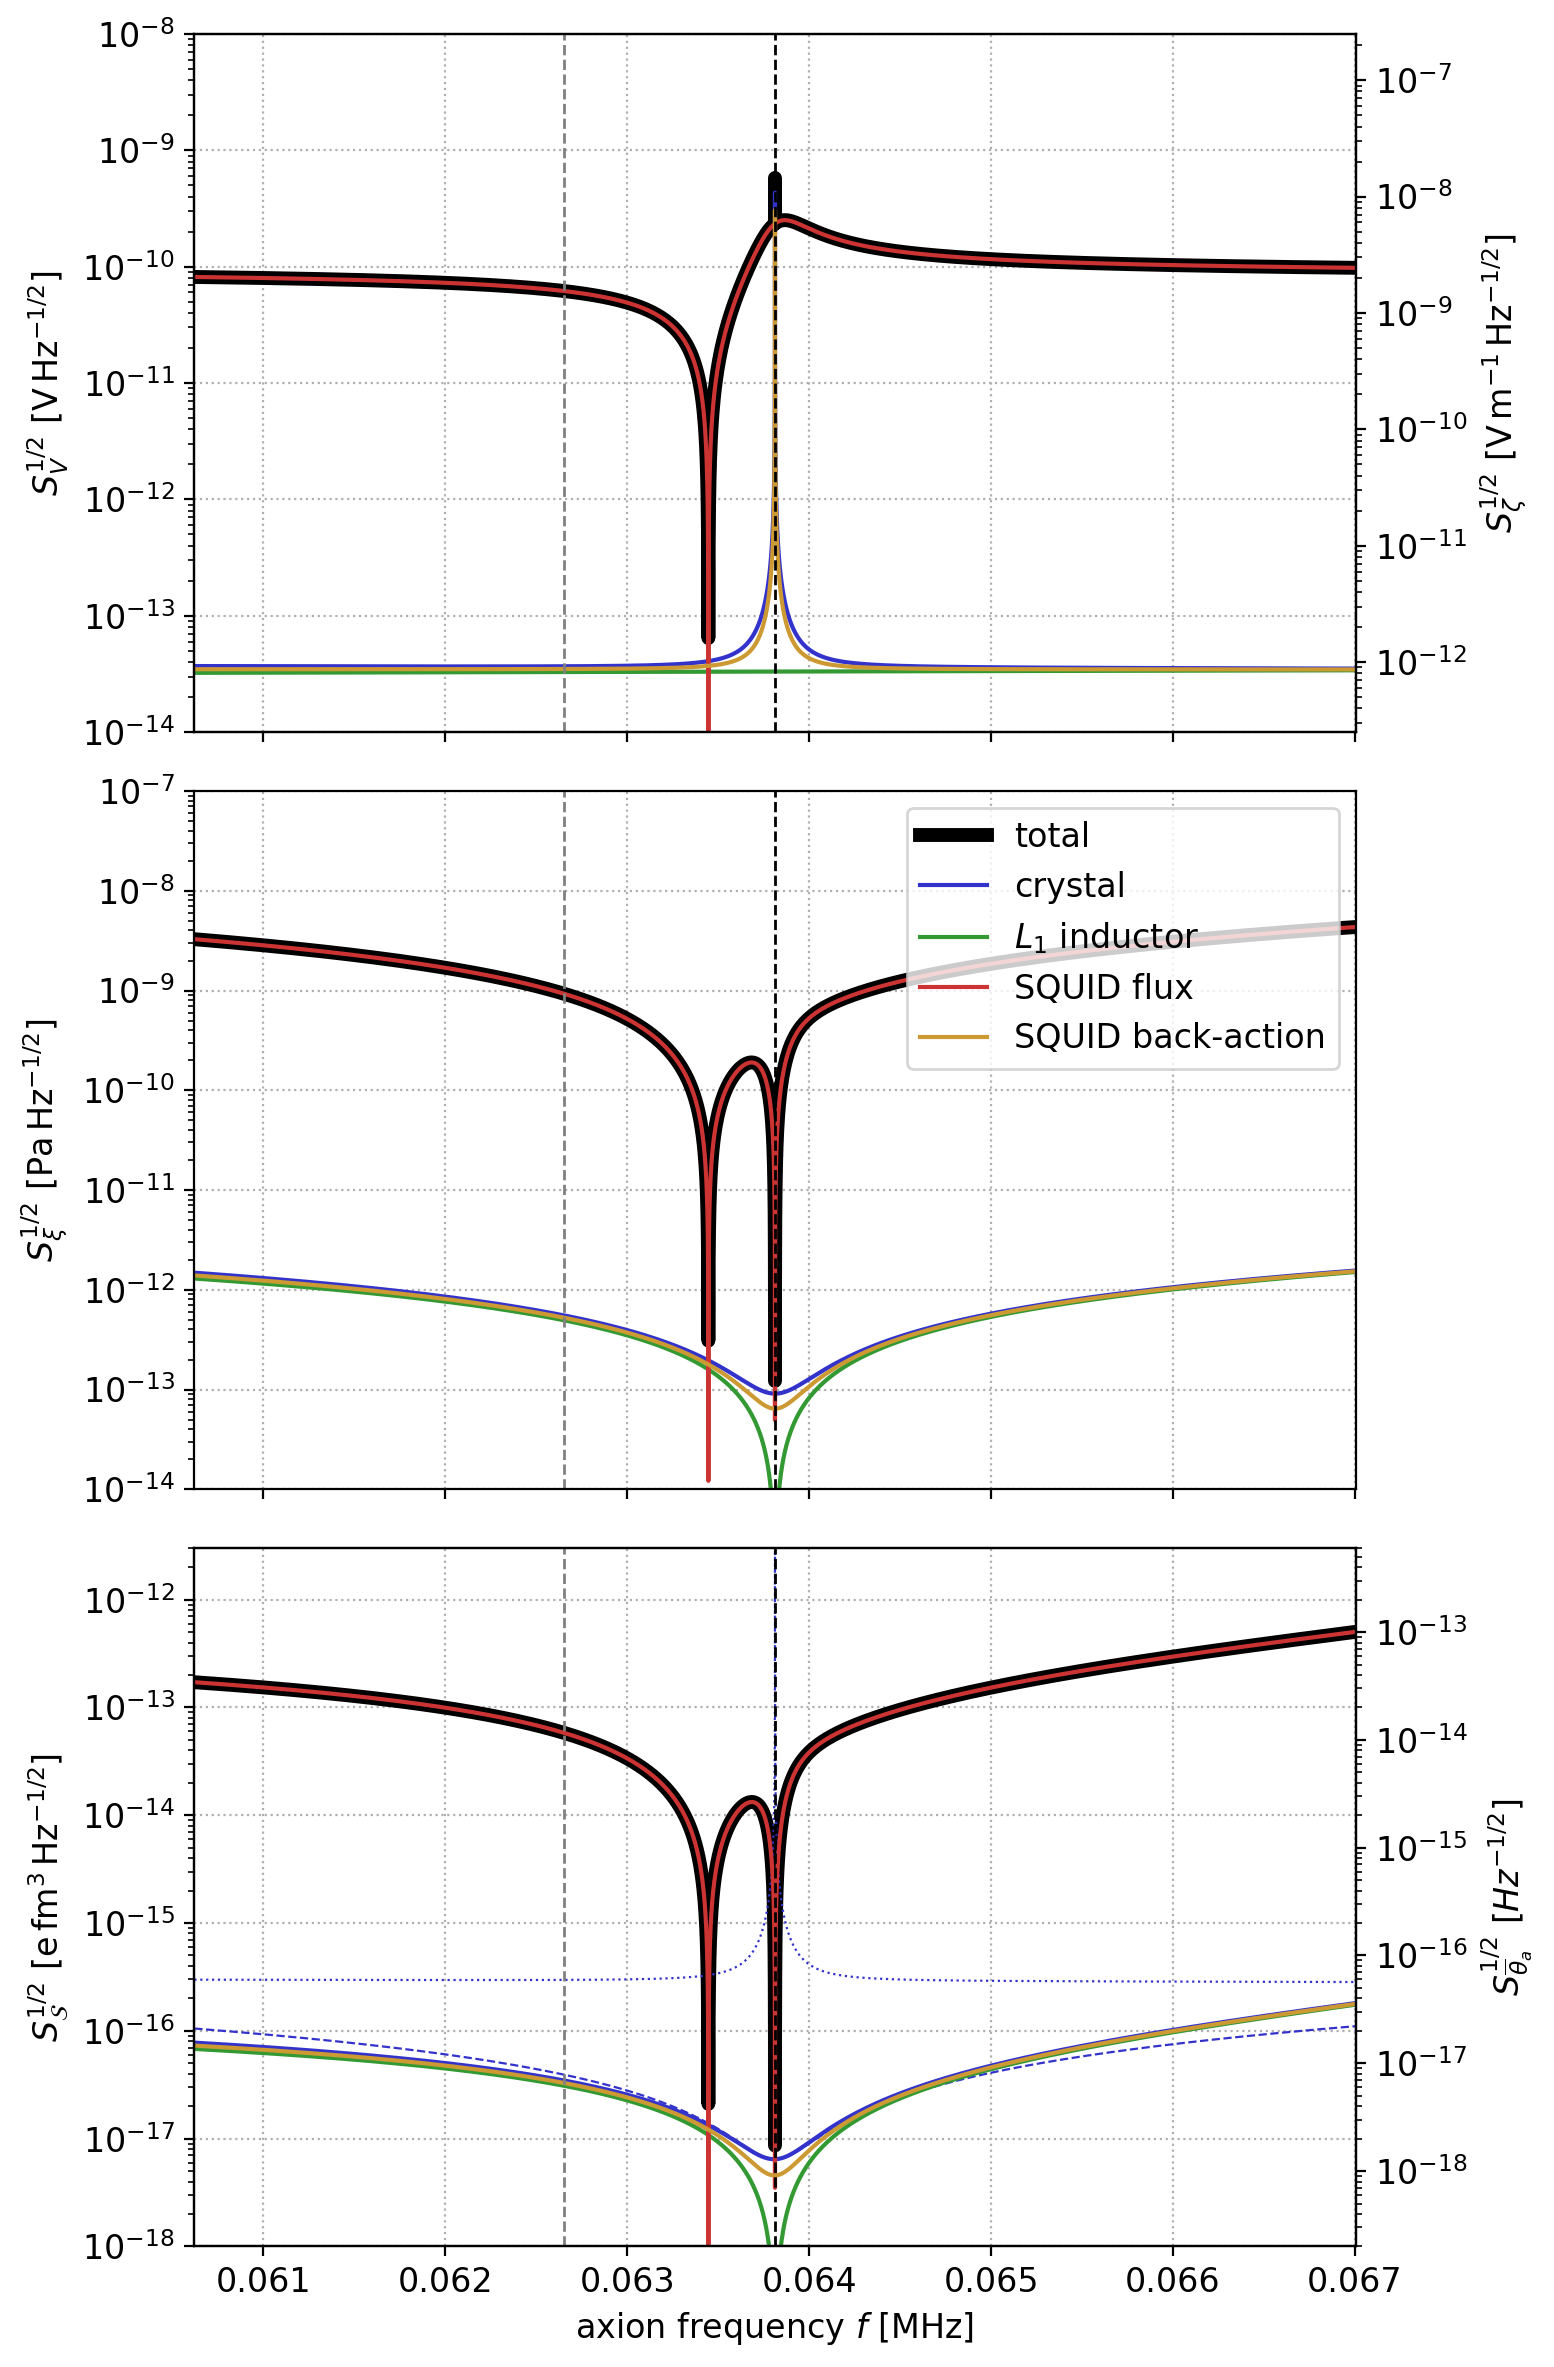

In [16]:
C_1 = (1/3) * np.real(fn_C_crystal_TE_c(l,a,b,beta_11))
L_1 =  0.05 * Henry * (1-1j * eps_L_1)

colors=[(0,0,0),(0.2,0.2,0.8),(0.2,0.2,0.8),(0.2,0.2,0.8),(0.2,0.6,0.2),(0.8,0.2,0.2),(0.8,0.6,0.2),(0.6,0.2,0.6),(0,0.5,0.5)]

vec_omega = np.linspace(0.95 * omega_0, 1.05 * omega_0, 200000)

fig, ax = plt.subplots(3, 1, figsize=(8,12))
vec_xi_fac = np.abs(fn_xi_over_V(vec_omega,l,v,h_11,c_11,N_series,P_nuc))
vec_S_schiff_fac = np.abs(fn_V_axion(vec_omega,xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_zeta = np.abs(fn_V_axion(vec_omega,0*xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_xi = np.abs(fn_V_axion(vec_omega,xi_11_over_S,0*zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1

vec_S_V_p_total = fn_S_V_p_total_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, T_2, mu_N, n_N, N_series,N_parallel)
vec_S_V_p_crystal_TE = fn_S_V_p_crystal_TE(T,vec_omega,l,v,a,b,beta_11,k2,N_series,N_parallel)
vec_S_V_p_L_1 = fn_S_V_p_L_1(T,vec_omega,L_1)
vec_S_V_p_squid_flux = fn_S_V_p_squid_flux_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, N_series,N_parallel)
vec_S_V_p_squid_BA = fn_S_V_p_squid_BA_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, N_series,N_parallel)
vec_S_V_p_squid_BI = fn_S_V_p_squid_BI(T,vec_omega, L_squid, R_squid, L_i, k_i, L_1, L_2, k_f)
vec_S_V_p_magnetization = fn_S_V_p_magnetization(vec_omega, T_2, mu_N, n_N, l, a, b)

ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_total)/(Volt/np.sqrt(Hz)),lw=5,color=colors[0],label='total');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_crystal_TE)/(Volt/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_L_1)/(Volt/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_flux)/(Volt/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BA)/(Volt/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_magnetization)/(Volt/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[0].plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BI)/(Volt/np.sqrt(Hz)),color=colors[8],label='SQUID back-action');

ax[0].axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[0].axvline(2*omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[0].axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[0].set_yscale('log'); ax[0].set_xscale('linear'); 
ylim0 = np.asarray([1e-14,1e-8])
ax[0].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); ax[0].set_ylim(ylim0[0], ylim0[1])
#ax[0].set_xlabel(r'$f ~ [\mathrm{MHz}]$'); 
ax[0].set_ylabel('$S_{V}^{1/2} ~ [\mathrm{V \, Hz^{-1/2}}]$');
#ax[0].legend(loc='upper right');
ax0r = ax[0].twinx();
ax0r.set_yscale('log');
ax0r.set_ylim(ylim0[0] * fn_zeta_over_V(l,N_series,P_nuc) / Meter**-1, ylim0[1] * fn_zeta_over_V(l,N_series,P_nuc) / Meter**-1)
ax0r.set_ylabel('$S_{\zeta}^{1/2} ~ [\mathrm{V \,m^{-1} \, Hz^{-1/2}}]$');
ax[0].set_xticklabels([])
ax[0].grid(ls='dotted')

ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_total)/(Pa/np.sqrt(Hz)),lw=5, color=colors[0],label='total');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_crystal_TE)/(Pa/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_L_1)/(Pa/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_flux)/(Pa/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_BA)/(Pa/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_magnetization)/(Pa/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[1].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_xi_fac * np.sqrt(vec_S_V_p_squid_BI)/(Pa/np.sqrt(Hz)),color=colors[8],label='SQUID back-impedance');

ax[1].axvline(omega_0/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='black')
ax[1].axvline(2*omega_0/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='black')
ax[1].axvline(fn_omega_res(l,v,h_11,c_11,beta_11)/(2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[1].set_yscale('log'); ax[1].set_xscale('linear'); 
ax[1].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); 
ax[1].set_ylim(ylim0[0], 10*ylim0[1])
#ax[1].set_xlabel(r'$f ~ [\mathrm{MHz}]$'); 
ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$S_{\xi}^{1/2} ~ [\mathrm{Pa \, Hz^{-1/2}}]$');
ax[1].legend(loc='upper right');
ax[1].grid(ls='dotted')

ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_total)/(ElectronCharge*fm**3/np.sqrt(Hz)),
       lw=5, label='total',color=colors[0],);
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[1],label='crystal');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac_xi * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),
           lw=0.8,ls='dashed',color=colors[2],label=r'crystal ($\xi$ only)');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac_zeta * np.sqrt(vec_S_V_p_crystal_TE)/(ElectronCharge*fm**3/np.sqrt(Hz)),
           lw=0.8,ls='dotted',color=colors[3],label=r'crystal ($\zeta$ only)');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_L_1)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');

ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_flux)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_BA)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
#ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_magnetization)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[7],label='magnetization');
#ax[2].plot(vec_omega / (2*np.pi*1e6*Second**-1), vec_S_schiff_fac * np.sqrt(vec_S_V_p_squid_BI)/(ElectronCharge*fm**3/np.sqrt(Hz)),color=colors[8],label='SQUID back-impedance');

ax[2].axvline(omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[2].axvline(2*omega_0 / (2*np.pi*1e6*Second**-1), ls='dashed',lw=1,color='black')
ax[2].axvline(fn_omega_res(l,v,h_11,c_11,beta_11) / (2*np.pi*1e6*Second**-1),ls='dashed',lw=1,color='gray')

ax[2].set_yscale('log'); ax[2].set_xscale('linear'); 
ylim2 = np.asarray([10**-18, 3*10**-12])
ax[2].set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1), vec_omega[-1]/(2*np.pi*1e6*Second**-1)); ax[2].set_ylim(ylim2)
ax[2].set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); ax[2].set_ylabel('$S_{\mathcal{S}}^{1/2} ~ [\mathrm{e \,fm^{3} \, Hz^{-1/2}}]$');
#ax[2].legend(loc='upper left');
ax2r = ax[2].twinx();
ax2r.set_yscale('log');
ax2r.set_ylim(ylim2[0] * ElectronCharge * fm**3 / S_schiff_over_theta, ylim2[1] * ElectronCharge * fm**3 / S_schiff_over_theta)
ax2r.set_ylabel(r'$S_{\overline{\theta}_a}^{1/2} ~ [Hz^{-1/2}]$');
ax[2].grid(ls='dotted')

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

In [17]:
fig.savefig(dir_fig+'S_fundamental.pdf', bbox_inches='tight', pad_inches = 0)

### Noise temperature (for optimized SQUID read-out)

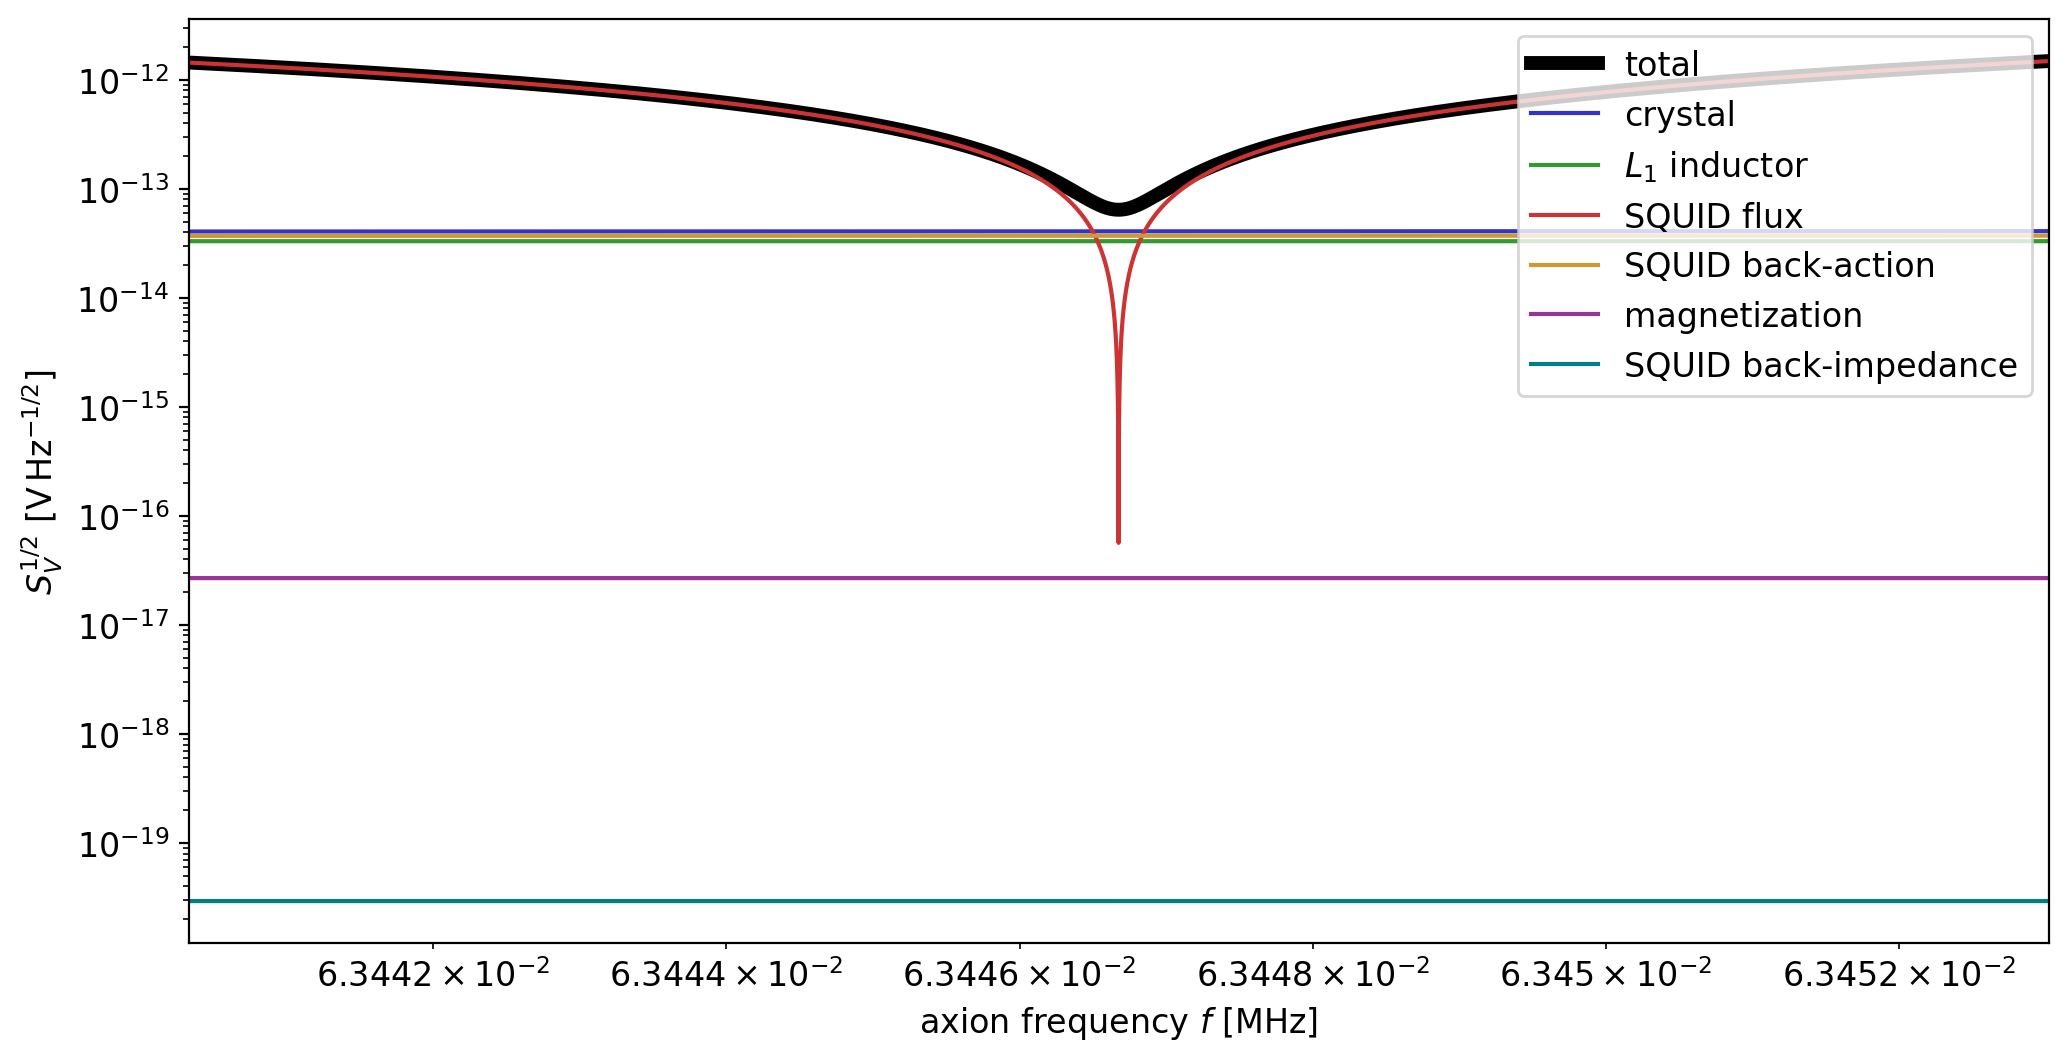

In [18]:
def fun(x):
    return np.log10(np.sqrt(fn_S_V_p_squid_flux_opt(T,x*omega_0,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, N_series,N_parallel)) / (Volt / np.sqrt(Hz)))
res = minimize(fun,0.99,method='Nelder-Mead',tol=1e-15)
vec_omega = omega_0 * np.sort(np.concatenate([res.x * (1 - np.logspace(-12,-4,1000)),res.x * (1 + np.logspace(-12,-4,1000))]))
#vec_omega = np.linspace(0.063642 * (2*np.pi*1e6*Second**-1),0.063643 * (2*np.pi*1e6*Second**-1), int(2e6))
vec_xi_fac = np.abs(fn_xi_over_V(vec_omega,l,v,h_11,c_11,N_series,P_nuc))
vec_S_schiff_fac = np.abs(fn_V_axion(vec_omega,xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_zeta = np.abs(fn_V_axion(vec_omega,0*xi_11_over_S,zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1
vec_S_schiff_fac_xi = np.abs(fn_V_axion(vec_omega,xi_11_over_S,0*zeta_11_over_S,l,v,h_11,c_11,N_series,P_nuc))**-1

vec_S_V_p_total = fn_S_V_p_total_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, T_2, mu_N, n_N, N_series,N_parallel)
vec_S_V_p_crystal_TE = fn_S_V_p_crystal_TE(T,vec_omega,l,v,a,b,beta_11,k2,N_series,N_parallel)
vec_S_V_p_L_1 = fn_S_V_p_L_1(T,vec_omega,L_1)
vec_S_V_p_squid_flux = fn_S_V_p_squid_flux_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, N_series,N_parallel)
vec_S_V_p_squid_BA = fn_S_V_p_squid_BA_opt(T,vec_omega,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, eta, N_series,N_parallel)
vec_S_V_p_squid_BI = fn_S_V_p_squid_BI(T,vec_omega, L_squid, R_squid, L_i, k_i, L_1, L_2, k_f)
vec_S_V_p_magnetization = fn_S_V_p_magnetization(vec_omega, T_2, mu_N, n_N, l, a, b)
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_total)/(Volt/np.sqrt(Hz)),lw=5,color=colors[0],label='total');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_crystal_TE)/(Volt/np.sqrt(Hz)),color=colors[1],label='crystal');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_L_1)/(Volt/np.sqrt(Hz)),color=colors[4],label=r'$L_1$ inductor');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_flux)/(Volt/np.sqrt(Hz)),color=colors[5],label='SQUID flux');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BA)/(Volt/np.sqrt(Hz)),color=colors[6],label='SQUID back-action');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_magnetization)/(Volt/np.sqrt(Hz)),color=colors[7],label='magnetization');
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.sqrt(vec_S_V_p_squid_BI)/(Volt/np.sqrt(Hz)),color=colors[8],label='SQUID back-impedance');
ax.set_xscale('log'); ax.set_yscale('log'); ax.legend(loc='upper right');
ax.set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1),vec_omega[-1]/(2*np.pi*1e6*Second**-1));
ax.set_ylabel('$S_{V}^{1/2} ~ [\mathrm{V \, Hz^{-1/2}}]$');
ax.set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); 

### Downstream signal

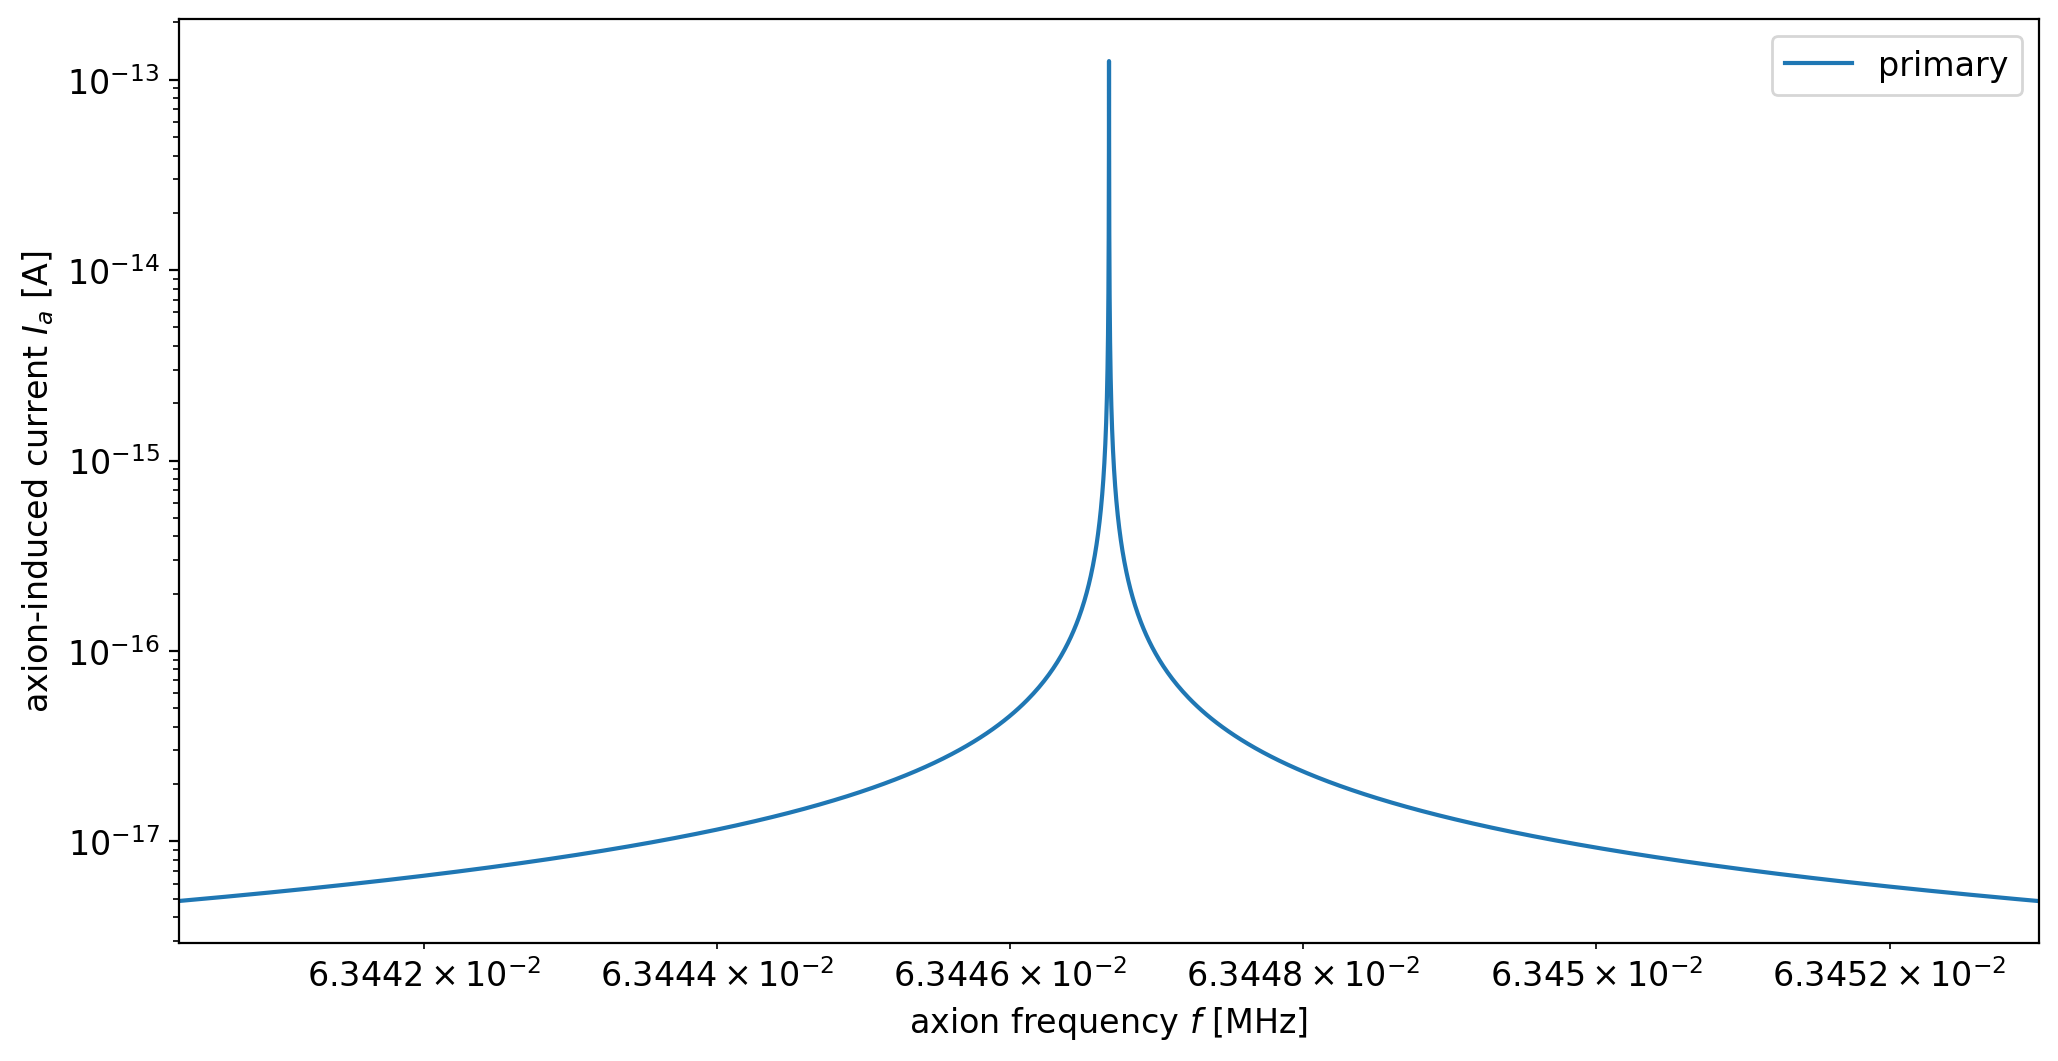

In [19]:
vec_omega = omega_0 * np.sort(np.concatenate([res.x * (1 - np.logspace(-15,-4,1000)),res.x * (1 + np.logspace(-15,-4,1000))]))
vec_I_axion_p = fn_I_axion_p(vec_omega,xi_11,zeta_11,h_11,c_11,P_nuc,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, N_series,N_parallel)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.abs(vec_I_axion_p) / Ampere, label='primary');
ax.set_xscale('log'); ax.set_yscale('log'); ax.legend(loc='upper right');
ax.set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1),vec_omega[-1]/(2*np.pi*1e6*Second**-1));
ax.set_ylabel(r'axion-induced current $I_a ~ [\mathrm{A}]$');
ax.set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); 

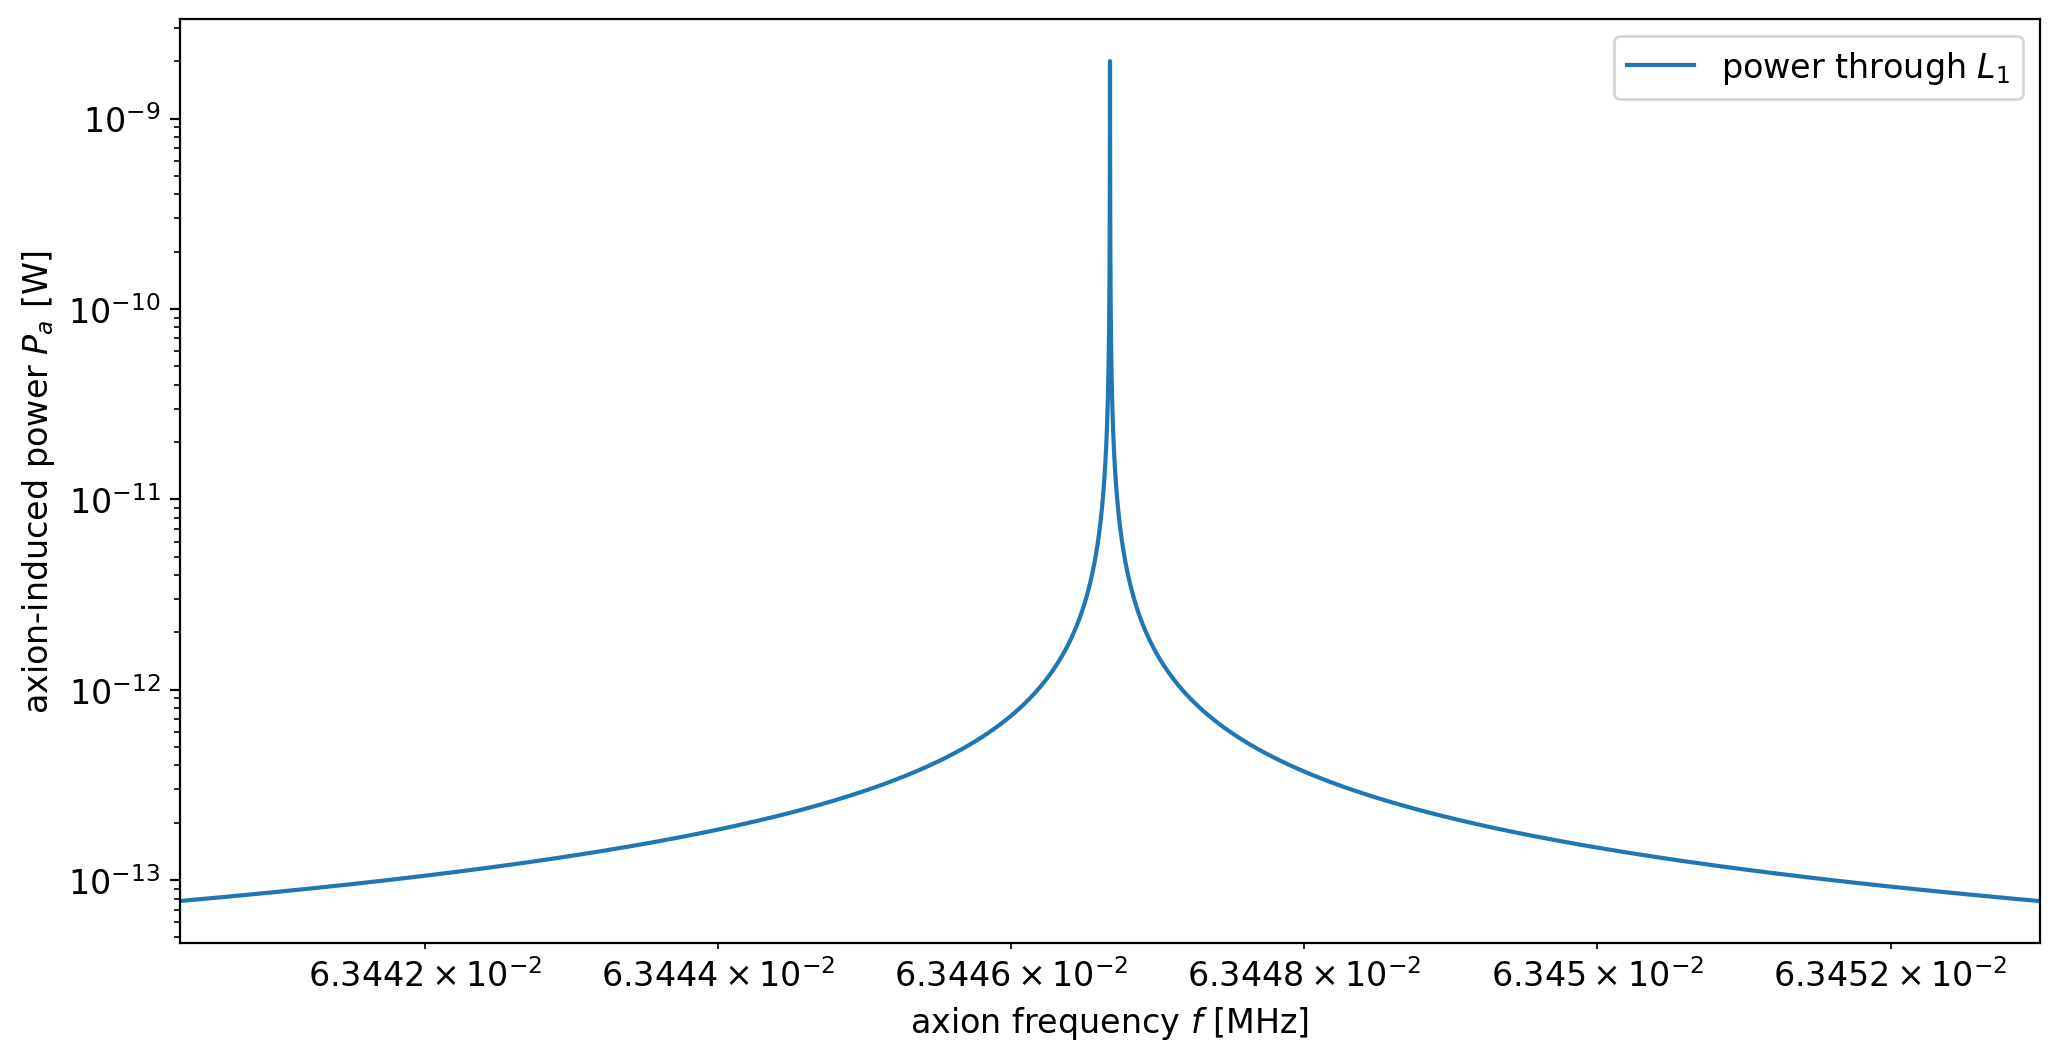

In [20]:
vec_P_axion_L_1 = np.abs(vec_I_axion_p) * np.real(fn_Z_L_1(vec_omega,L_1))

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.abs(vec_P_axion_L_1) / Watt, label=r'power through $L_1$');
ax.set_xscale('log'); ax.set_yscale('log'); ax.legend(loc='upper right');
ax.set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1),vec_omega[-1]/(2*np.pi*1e6*Second**-1));
ax.set_ylabel(r'axion-induced power $P_a ~ [\mathrm{W}]$');
ax.set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); 

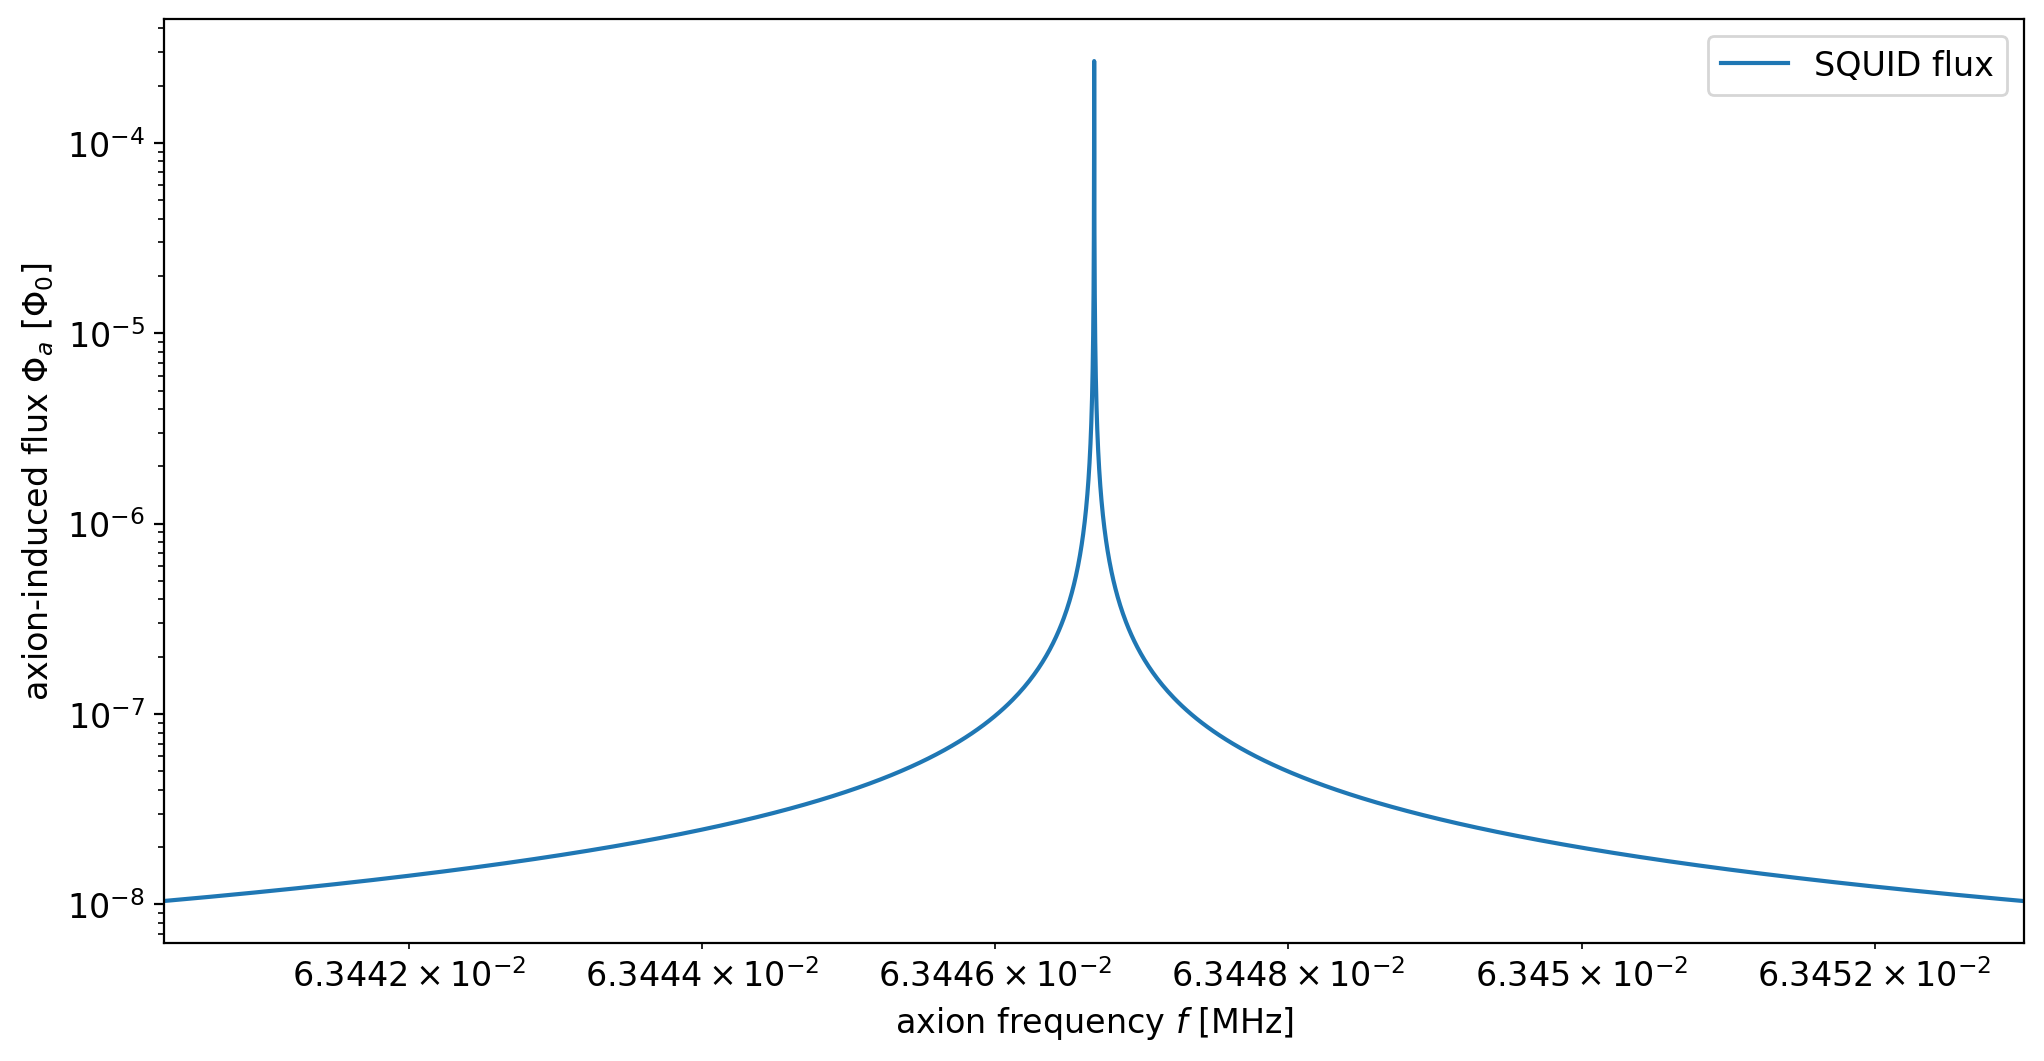

In [21]:
vec_flux_squid = fn_flux_axion_squid(vec_omega,xi_11,zeta_11,h_11,c_11,P_nuc,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1, L_2, k_f, N_series,N_parallel)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(vec_omega / (2*np.pi*1e6*Second**-1), np.abs(vec_flux_squid) / Phi0, label=r'SQUID flux');
ax.set_xscale('log'); ax.set_yscale('log'); ax.legend(loc='upper right');
ax.set_xlim(vec_omega[0]/(2*np.pi*1e6*Second**-1),vec_omega[-1]/(2*np.pi*1e6*Second**-1));
ax.set_ylabel(r'axion-induced flux $\Phi_a ~ [\Phi_0]$');
ax.set_xlabel(r'axion frequency $f ~ [\mathrm{MHz}]$'); 

## Optimization over C_1 and L_1

In [22]:
vec_L_1 = L_1_fid * np.logspace(-1,1,100)
vec_C_1 = C_1_fid * np.logspace(-1,1,100)

arr_omega_opt = np.ones((len(vec_L_1),len(vec_C_1),2)) * np.nan; 
arr_S_opt = np.ones((len(vec_L_1),len(vec_C_1),2)) * np.nan; 

for i,L_1 in enumerate(vec_L_1):
    L_1_n = L_1 * (1 - 1j * eps_L_1)
    for j,C_1 in enumerate(vec_C_1):
        def fun_Z(omega_frac):
            return np.imag(fn_Z_total(omega_frac * omega_0,l,v,a,b,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1_n, L_2, k_f, N_series,N_parallel))
        def fun_S(omega_frac):
            return fn_S_theta_opt(T,omega_frac * omega_0,l,v,a,b,h_11,c_11,beta_11,k2,L_squid, R_squid, L_i, k_i, C_1, L_1_n, L_2, k_f, eta, T_2, mu_N, n_N, xi_11, zeta_11, P_nuc, N_series,N_parallel)
        try:
            arr_omega_opt[i,j,0] = brentq(f=fun_Z,a=(2*omega_res-omega_0)/omega_0,b=(1-1e-5),xtol=1e-15)
            arr_S_opt[i,j,0] = fun_S(arr_omega_opt[i,j,0])
        except ValueError:
            pass
        try:
            arr_omega_opt[i,j,1] = brentq(f=fun_Z,a=1+1e-5,b=(2*omega_0-omega_res)/omega_0,xtol=1e-15)
            arr_S_opt[i,j,1] = fun_S(arr_omega_opt[i,j,1])
        except ValueError:
            pass

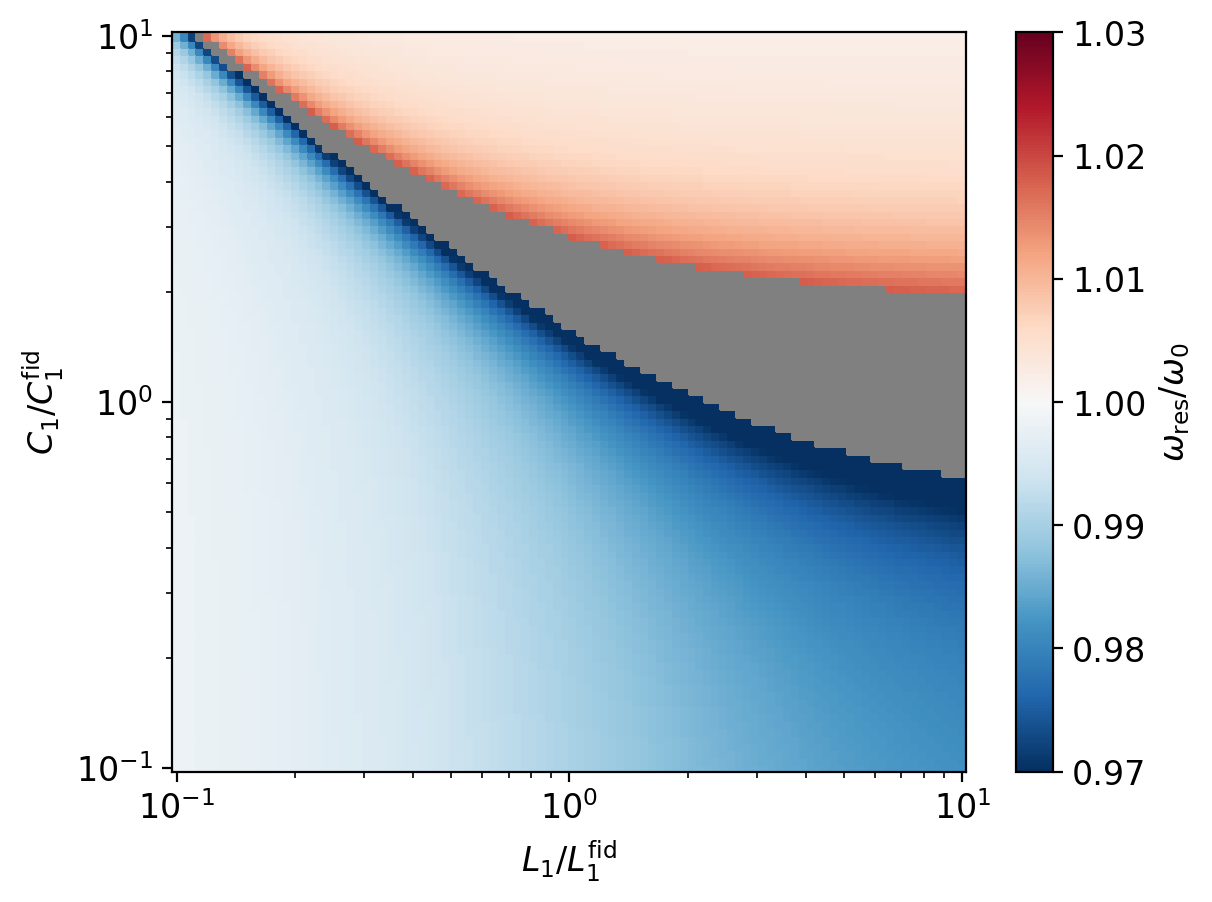

In [23]:
cmap = plt.cm.get_cmap('RdBu_r').copy()
cmap.set_bad('gray')
arr = np.sum(np.nan_to_num(arr_omega_opt[:,:,:],nan=0),axis=2)
arr[arr<0.5]=np.nan
fig, ax = plt.subplots(1,1)
h = ax.pcolormesh(vec_L_1/L_1_fid,vec_C_1/C_1_fid,arr,shading='nearest',vmin=0.97,vmax=1.03,cmap=cmap);
h.set_edgecolor('face')
ax.set_xlabel('$L_1/L_1^\mathrm{fid}$'); ax.set_ylabel('$C_1/C_1^\mathrm{fid}$'); ax.set_xscale('log'); ax.set_yscale('log');
fig.colorbar(h,ax=ax,label='$\omega_\mathrm{res}/\omega_0$');

In [24]:
fig.savefig(dir_fig+'scanning_C1_L1.pdf', bbox_inches='tight', pad_inches = 0)